In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pip install factor-analyzer
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

**Part 1 -->1.1 Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.**

In [2]:
ad_data = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

**printing a few rows (head and tail)**

In [4]:
ad_data.head()


Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [5]:
ad_data.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [6]:
# checking info 
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

**checking null values**

In [6]:
ad_data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

* null values are present in column CTR, CPM, CPC 
* We need to treat null values.

**checking for duplicates**

In [3]:
dups=ad_data.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Statistical Summary**

In [8]:
ad_data.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

**observations**
* Minimum value for several variables is 0.
* There is huge variation in the min and max value which shows the presence of outliers in the data set.

In [9]:
ad_data.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [10]:
ad_data.InventoryType.value_counts()

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

In [11]:
ad_data['Platform'].value_counts()

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

In [12]:
ad_data['Device Type'].value_counts()

Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64

In [13]:
ad_data['Format'].value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

**Part 1 -->1.2 Clustering: Treat missing values in CPC, CTR and CPM using the formula given.**

**CPM = (Total Campaign Spend / Number of Impressions) * 1,000.** Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

**CPC = Total Cost (spend) / Number of Clicks.**  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

**CTR = Total Measured Clicks / Total Measured Ad Impressions x 100.** Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 


**Missing Value Tratment**

In [3]:
# Let's create user defined function to treat Missing values.
# CPM = (Total Campaign Spend / Number of Impressions) * 1,000.
def calculate_cpm(x):
    compaign = ad_data['Spend']
    impressions = ad_data['Impressions']
    cpm = (compaign/impressions)*1000
    return cpm

In [4]:
ad_data['CPM']  = ad_data[['CPM']].apply(lambda x:calculate_cpm(x))   # note the use of double square bracket

In [5]:
ad_data['CPM'].isnull().sum()

0

In [17]:
ad_data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [18]:
ad_data.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR   CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  70.0  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  20.0  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  50.0  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  70.0  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  45.0  NaN

In [6]:
# Let's create user defined function to treat Missing values.
# CPC = Total Cost (spend) / Number of Clicks.
def calculate_cpc(x):
    total_cost = ad_data['Spend']
    no_of_clicks = ad_data['Clicks']
    cpc = total_cost/no_of_clicks
    return cpc

In [7]:
ad_data['CPC'] = ad_data[['CPC']].apply(lambda x: calculate_cpc(x))

In [8]:
ad_data['CPC'].isnull().sum()

0

In [9]:
# CTR = Total Measured Clicks / Total Measured Ad Impressions x 100.
def calculate_ctr(x):
    total_clicks = ad_data['Clicks']
    total_impression = ad_data['Impressions']
    ctr = (total_clicks/total_impression)*100
    return ctr

In [10]:
ad_data['CTR'] = ad_data[['CTR']].apply(lambda x:calculate_ctr(x))

In [11]:
ad_data[['CPM','CPC','CTR']].isnull().sum()

CPM    0
CPC    0
CTR    0
dtype: int64

In [13]:
ad_data.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [14]:
ad_data.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue    CTR   CPM   CPC  
23061            1       1   0.07  0.35   0.0455  100.0  70.0  0.07  
23062            2       1   0.04  0.35   0.0260   50.0  20.0  0.04  
23063            1       1   0.05  0.35   0.0325  100.0  50.0  0.05  
23064            1       1   0.07  0.35   0.0455  100.0  70.0  0.07  
23065            2       1   0.09  0.35   0.0585   50.0  45.0  0.09

In [27]:
ad_data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [28]:
ad_data.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

**Part 1 -->1.3 Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).**


In [29]:
len(ad_data.columns)

19

* To check and Treat outliers we will first divide the dataset based on numercal and categorical field into two different datasets and post the outlier treatment we will Merge both the dataset for fulther clustering process. 

In [12]:
ad_num = ad_data.select_dtypes(['int64','float64'])
ad_cat = ad_data.select_dtypes(['object'])

In [31]:
ad_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0

In [32]:
ad_num.tail()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue    CTR  \
23061                1            1       1   0.07  0.35   0.0455  100.0   
23062                2            2       1   0.04  0.35   0.0260   50.0   
23063                1            1       1   0.05  0.35   0.0325  100.0   
23064                1            1       1   0.07  0.35   0.0455  100.0   
23065                2            2       1   0.09  0.35   0.0585   50.0   

        CPM   CPC  
23061  70.0  0.07  
23062  20.0  0.04  
23063  50.0  0.05  
23064  70.0  0.07  
23065  45.0  0.09

In [33]:

ad_num.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

In [34]:
print("CTR:", ad_num['CTR'].max())
print("CPM:", ad_num['CPM'].max())
print("CPC:", ad_num['CPC'].max())

CTR: 200.0
CPM: 715.0
CPC: 7.264


**Checking for outliers**

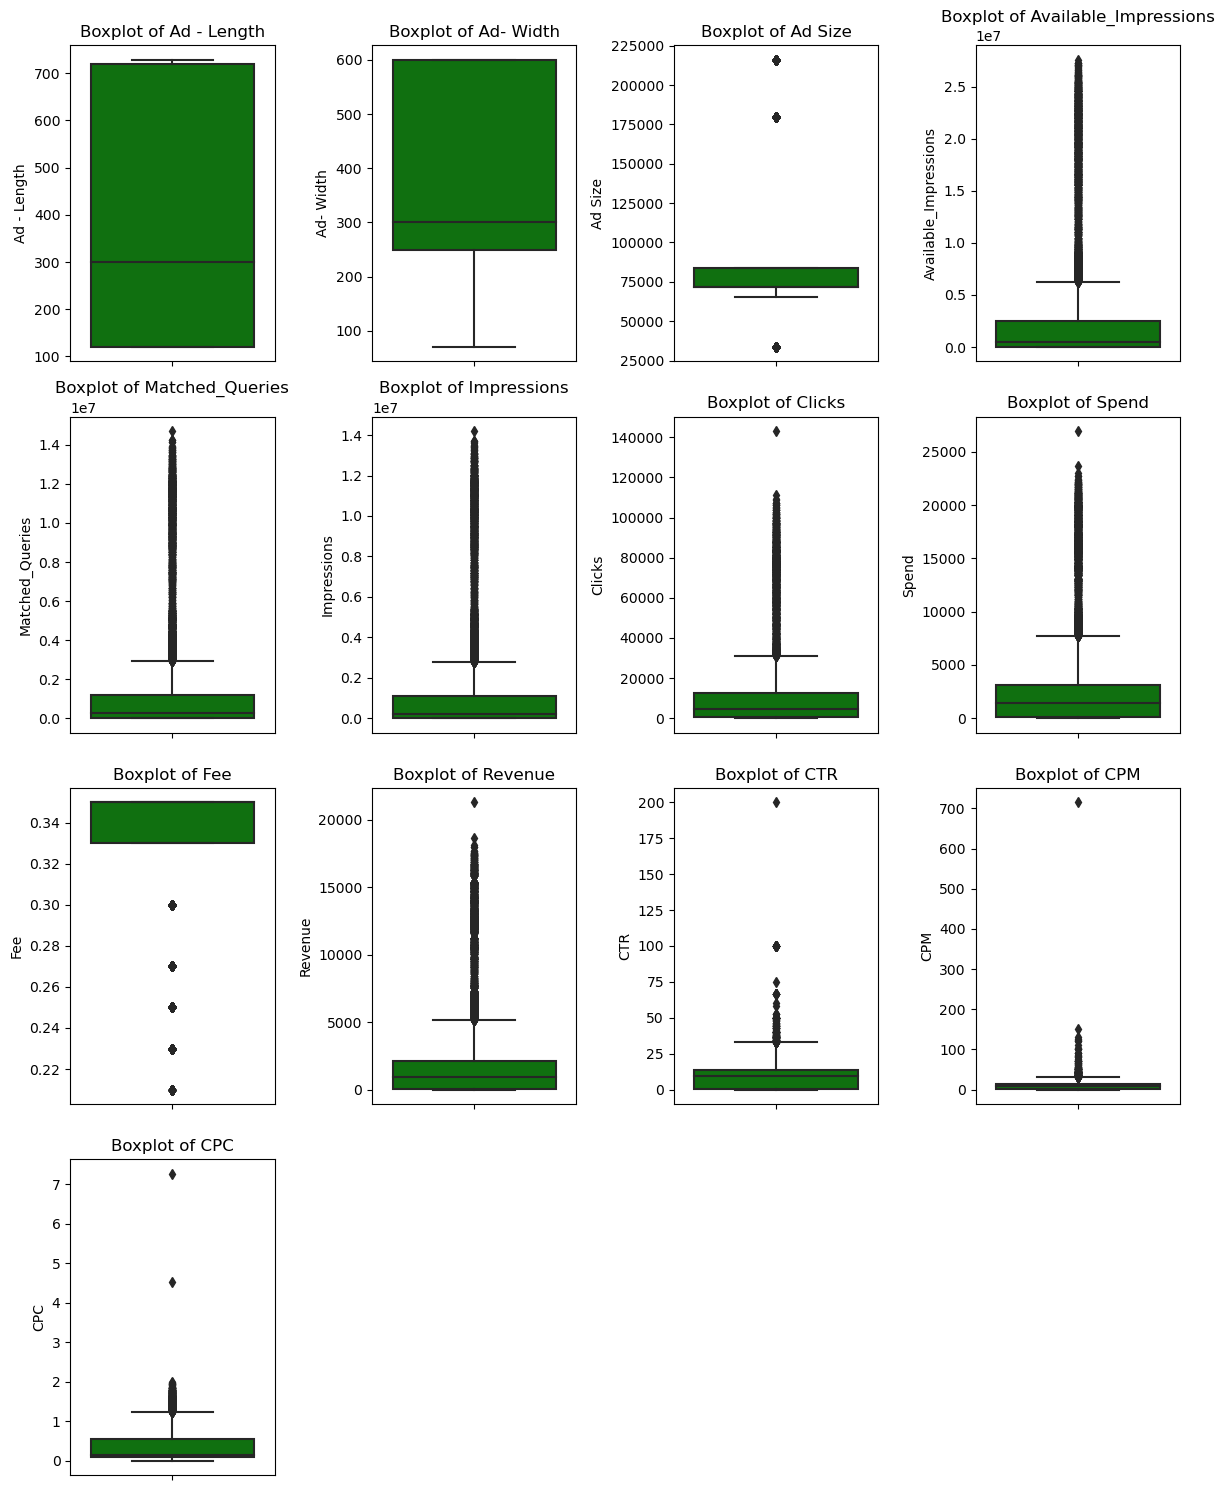

In [35]:
plt.figure(figsize=(12,15))
feature_list = ad_num.columns
for i in range (len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=ad_num[feature_list[i]],data=ad_num,color='green')
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()
    #plt.show()

                                  **Boxplot showing presence of Outliers**

**outliers treatment**

* treating outliers is necessary for K-Means clustering as Kmeans uses distance-based metrics to calculate the distance between variables and then groups them based on similarities.
* Treating outliers using IQR method.

In [13]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [14]:
# Cap & floor the values beyond the outlier boundaries
feature_list=ad_num.columns
for i in feature_list:
    LL,UL = remove_outlier(ad_num[i])
    ad_num[i] = np.where(ad_num[i] > UL,UL,ad_num[i])
    ad_num[i] = np.where(ad_num[i] < LL,LL,ad_num[i])

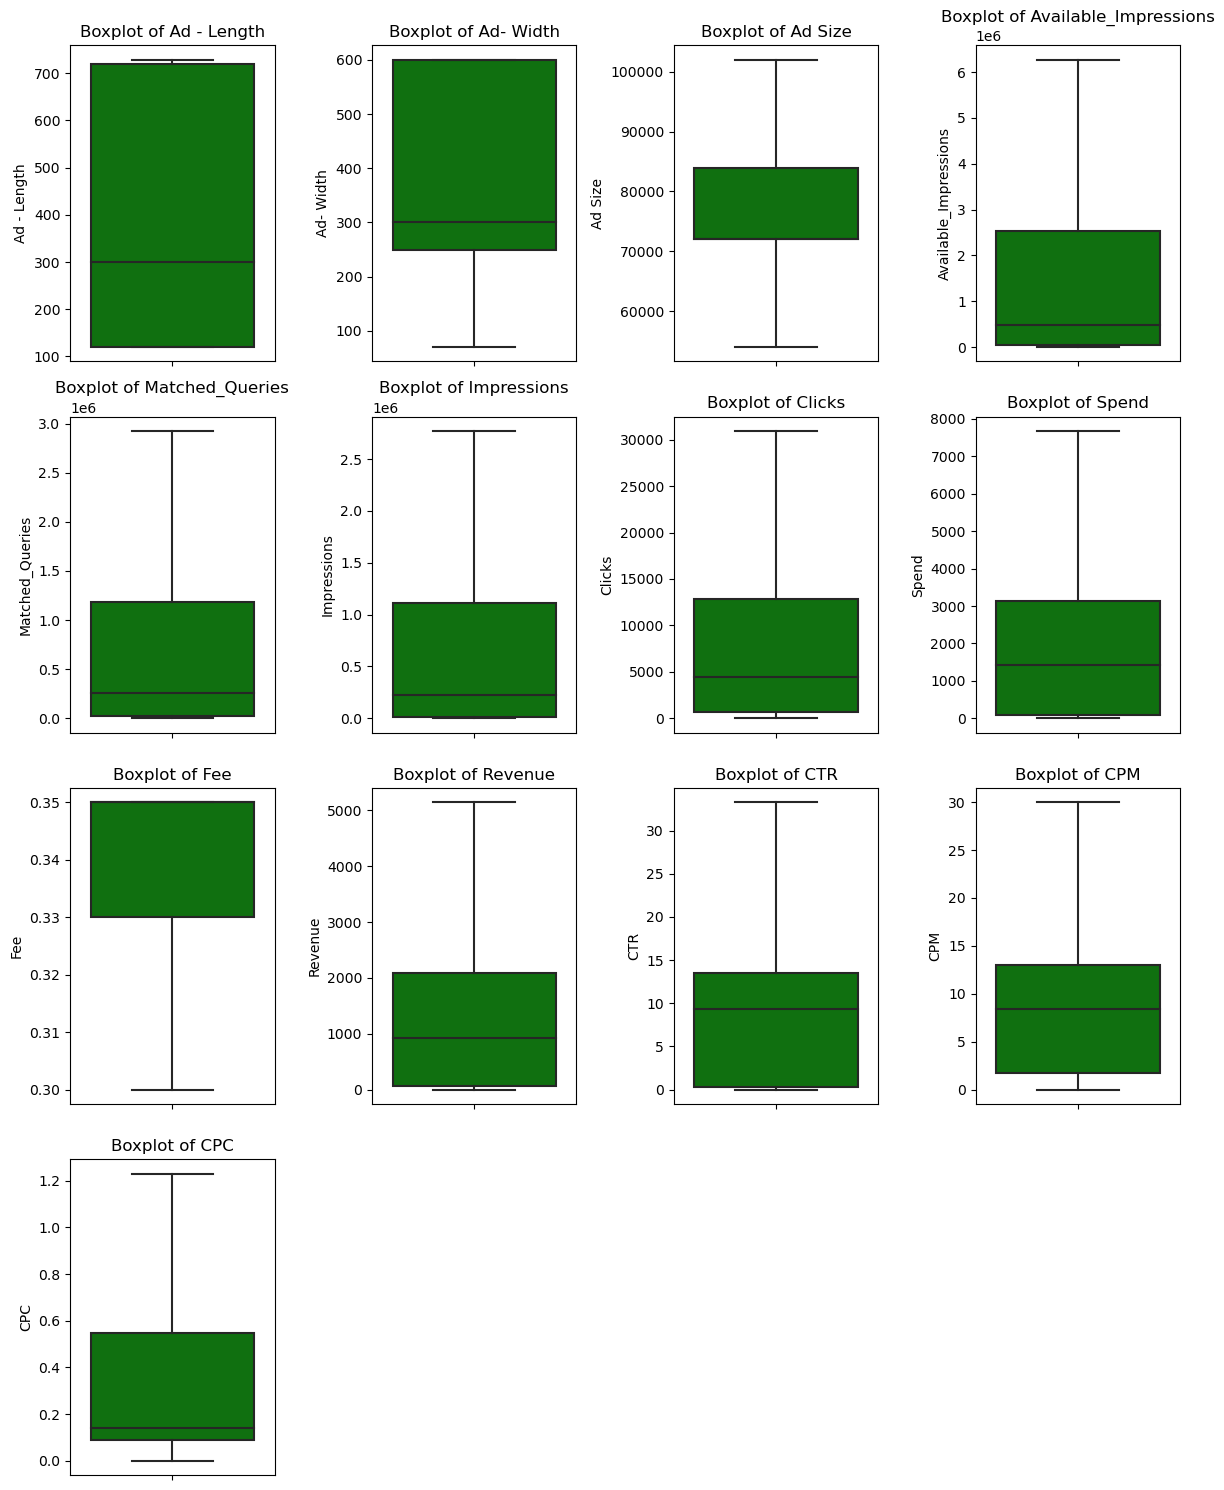

In [18]:
plt.figure(figsize=(12,15))
feature_list = ad_num.columns
for i in range (len(feature_list)):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=ad_num[feature_list[i]],data=ad_num,color='green')
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()
    

                                **Boxplots post Outlier Treatment**

In [39]:
ad_num.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  7.657684e+04  1.538132e+04  54000.000000   
Available_Impressions  23066.0  1.607253e+06  2.125528e+06      1.000000   
Matched_Queries        23066.0  7.995380e+05  1.026037e+06      1.000000   
Impressions            23066.0  7.536120e+05  9.802568e+05      1.000000   
Clicks                 23066.0  8.306828e+03  9.574779e+03      1.000000   
Spend                  23066.0  2.166060e+03  2.425190e+03      0.000000   
Fee                    23066.0  3.402883e-01  1.812855e-02      0.300000   
Revenue                23066.0  1.449389e+03  1.646894e+03      0.000000   
CTR                    23066.0  8.223203e+00  8.253522e+00      0.010874   
CPM                    23066.0  8.219181e+00  6.881016e+00      0.000000   
CPC                    23066.0  3.300346e-01  3.165682e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  1.020000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  6.268771e+06  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  2.924326e+06  
Impressions             7990.500000  225290.000000  1.112428e+06  2.769086e+06  
Clicks                   710.000000    4425.000000  1.279375e+04  3.091938e+04  
Spend                     85.180000    1425.125000  3.121400e+03  7.675730e+03  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  5.145297e+03  
CTR                        0.265107       9.391248  1.347057e+01  3.327877e+01  
CPM                        1.749084       8.371566  1.304202e+01  2.998142e+01  
CPC                        0.089736       0.139347  5.462421e-01  1.231002e+00

In [15]:
print("CTR:", ad_num['CTR'].max())
print("CPM:", ad_num['CPM'].max())
print("CPC:", ad_num['CPC'].max())

CTR: 33.27876617457427
CPM: 29.981418178163874
CPC: 1.2310015773280991


In [16]:
ad_data_new = pd.concat([ad_cat,ad_num],axis=1)

In [17]:
ad_data_new.shape

(23066, 19)

In [43]:
ad_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad Type                23066 non-null  object 
 3   Platform               23066 non-null  object 
 4   Device Type            23066 non-null  object 
 5   Format                 23066 non-null  object 
 6   Ad - Length            23066 non-null  float64
 7   Ad- Width              23066 non-null  float64
 8   Ad Size                23066 non-null  float64
 9   Available_Impressions  23066 non-null  float64
 10  Matched_Queries        23066 non-null  float64
 11  Impressions            23066 non-null  float64
 12  Clicks                 23066 non-null  float64
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [39]:
ad_data_new.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format  \
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display   
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video   
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display   
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video   
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video   

   Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0

In [44]:
ad_data_new.tail()

Timestamp InventoryType   Ad Type Platform Device Type Format  \
23061   2020-9-13-7       Format5  Inter220      Web      Mobile  Video   
23062   2020-11-2-7       Format5  Inter224      Web     Desktop  Video   
23063  2020-9-14-22       Format5  Inter218      App      Mobile  Video   
23064  2020-11-18-2       Format4  inter230    Video      Mobile  Video   
23065   2020-9-14-0       Format5  Inter221      App      Mobile  Video   

       Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09

In [45]:
ad_data_new.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  7.657684e+04  1.538132e+04  54000.000000   
Available_Impressions  23066.0  1.607253e+06  2.125528e+06      1.000000   
Matched_Queries        23066.0  7.995380e+05  1.026037e+06      1.000000   
Impressions            23066.0  7.536120e+05  9.802568e+05      1.000000   
Clicks                 23066.0  8.306828e+03  9.574779e+03      1.000000   
Spend                  23066.0  2.166060e+03  2.425190e+03      0.000000   
Fee                    23066.0  3.402883e-01  1.812855e-02      0.300000   
Revenue                23066.0  1.449389e+03  1.646894e+03      0.000000   
CTR                    23066.0  8.223203e+00  8.253522e+00      0.010874   
CPM                    23066.0  8.219181e+00  6.881016e+00      0.000000   
CPC                    23066.0  3.300346e-01  3.165682e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  1.020000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  6.268771e+06  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  2.924326e+06  
Impressions             7990.500000  225290.000000  1.112428e+06  2.769086e+06  
Clicks                   710.000000    4425.000000  1.279375e+04  3.091938e+04  
Spend                     85.180000    1425.125000  3.121400e+03  7.675730e+03  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  5.145297e+03  
CTR                        0.265107       9.391248  1.347057e+01  3.327877e+01  
CPM                        1.749084       8.371566  1.304202e+01  2.998142e+01  
CPC                        0.089736       0.139347  5.462421e-01  1.231002e+00

**Part 1 -->1.4 Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.**

In [18]:
from sklearn.preprocessing import StandardScaler

* For scaling we will first extract the Numerical/continuous column from the dataset using iloc() function.

**Subset the Dataset**

In [19]:
data = ad_data_new.iloc[:,6:]

In [48]:
data.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0

In [20]:
x = StandardScaler()

In [21]:
scaled_ad_data = pd.DataFrame(x.fit_transform(data),columns=ad_data_new.columns[6:])

In [22]:
scaled_ad_data.head(5)

Ad - Length  Ad- Width   Ad Size  Available_Impressions  Matched_Queries  \
0    -0.364496  -0.432797 -0.102518              -0.755333        -0.778949   
1    -0.364496  -0.432797 -0.102518              -0.755345        -0.778988   
2    -0.364496  -0.432797 -0.102518              -0.754900        -0.778919   
3    -0.364496  -0.432797 -0.102518              -0.755040        -0.778781   
4    -0.364496  -0.432797 -0.102518              -0.755610        -0.779030   

   Impressions    Clicks    Spend       Fee   Revenue       CTR       CPM  \
0    -0.768478 -0.867488 -0.89317  0.535724 -0.880093 -0.958836 -1.194498   
1    -0.768516 -0.867488 -0.89317  0.535724 -0.880093 -0.953835 -1.194498   
2    -0.768445 -0.867488 -0.89317  0.535724 -0.880093 -0.962218 -1.194498   
3    -0.768302 -0.867488 -0.89317  0.535724 -0.880093 -0.971871 -1.194498   
4    -0.768560 -0.867488 -0.89317  0.535724 -0.880093 -0.946281 -1.194498   

        CPC  
0 -1.042561  
1 -1.042561  
2 -1.042561  
3 -1.042561  
4 -1.042561

**Scaling effect on the speed of the algorithm.**

* From the statistical summary of the dataset we can see that the magnitude of values lies from very low range to very high range and the values are in different scales having different weightage so Scaling is Must to bring the dataset in same scale.
* Scaling scales the data in the same magnitude closer to mean of Zero and standard deviation as one.
* If the data is not scaled we are bound to get results that are highly influenced by the column that has the hugher magnitude.
* In scaled data Since the values for all the numeric columns are having the same magnitude, the execution of the algorithm is faster and the results are more accurate.

**Part 1 -->1.5 Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.**

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

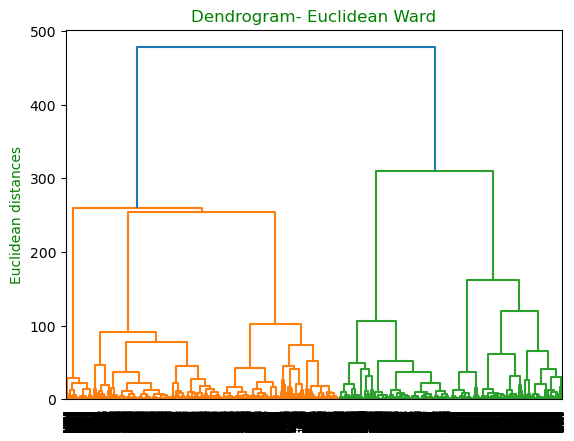

In [38]:
import scipy.cluster.hierarchy as sch 
# Illustrative clustering using Ward’s method:
dend1 = sch.dendrogram(sch.linkage(scaled_ad_data, method = "ward", metric='euclidean'))
plt.title('Dendrogram- Euclidean Ward',color ='green')
plt.ylabel('Euclidean distances',color='green')
plt.show()

**Cutting the Dendrogram with suitable clusters**

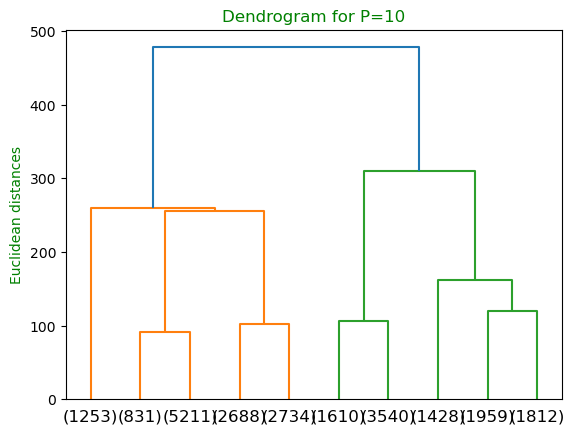

In [72]:
dend = dendrogram(wardlink,truncate_mode='lastp',p = 10)
plt.title('Dendrogram for P=10',color ='green')
plt.ylabel('Euclidean distances',color='green')
plt.show()                

**Part 1 -->1.6 Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.**

In [39]:
from sklearn.cluster import KMeans
wss=[]

In [40]:
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=0)
    k_means.fit(scaled_ad_data)
    wss.append(k_means.inertia_)

In [41]:
wss

[299858.0000000003,
 183349.1043840474,
 130878.35297256609,
 95133.93066619671,
 61539.18919785387,
 51676.89681600448,
 44598.25849746795,
 39597.8500701999,
 36197.029410227464,
 33862.73949141208]

Text(0.5, 1.0, 'Elbow Plot')

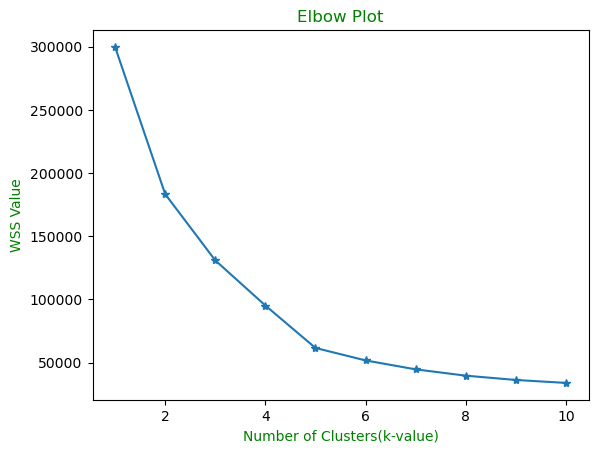

In [30]:
plt.plot(range(1,11),wss,marker='*')
plt.xlabel("Number of Clusters(k-value)",color='green')
plt.ylabel("WSS Value",color='green')
plt.title("Elbow Plot",color='green')

* From the above Elbow plot and WSS (within sum of squares) value we can choose optimum number of cluster as 5.
* Upto K=5 the drop in WSS value is significant.
* Beyond K=5, the drop is not significant..

In [42]:
k_means = KMeans(n_clusters=5,random_state=0)
k_means.fit(scaled_ad_data)
labels = k_means.labels_
print(labels)

[2 2 2 ... 3 0 3]


In [43]:
ad_data_new['Clusters'] = labels

In [44]:
ad_data_new.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format  \
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display   
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video   
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display   
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video   
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video   

   Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0        300.0      250.0  75000.0                 1806.0            325.0   
1        300.0      250.0  75000.0                 1780.0            285.0   
2        300.0      250.0  75000.0                 2727.0            356.0   
3        300.0      250.0  75000.0                 2430.0            497.0   
4        300.0      250.0  75000.0                 1218.0            242.0   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clusters  
0        323.0     1.0    0.0  0.35      0.0  0.309598  0.0  0.0         2  
1        285.0     1.0    0.0  0.35      0.0  0.350877  0.0  0.0         2  
2        355.0     1.0    0.0  0.35      0.0  0.281690  0.0  0.0         2  
3        495.0     1.0    0.0  0.35      0.0  0.202020  0.0  0.0         2  
4        242.0     1.0    0.0  0.35      0.0  0.413223  0.0  0.0         2

In [45]:
ad_data_new.tail()

Timestamp InventoryType   Ad Type Platform Device Type Format  \
23061   2020-9-13-7       Format5  Inter220      Web      Mobile  Video   
23062   2020-11-2-7       Format5  Inter224      Web     Desktop  Video   
23063  2020-9-14-22       Format5  Inter218      App      Mobile  Video   
23064  2020-11-18-2       Format4  inter230    Video      Mobile  Video   
23065   2020-9-14-0       Format5  Inter221      App      Mobile  Video   

       Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  Clusters  
23061  29.981418  0.07         3  
23062  20.000000  0.04         3  
23063  29.981418  0.05         3  
23064  29.981418  0.07         0  
23065  29.981418  0.09         3

**Part 1 -->1.7 Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.**


In [46]:
from sklearn.metrics import silhouette_score 

In [47]:
ss={1:0} 
for i in range(2,11): 
    clusterer = KMeans(n_clusters = i, init = 'k-means++',random_state=0) 
    y=clusterer.fit_predict(scaled_ad_data) # The higher (up to 1) the better 
    s =silhouette_score(scaled_ad_data, y ) 
    ss[i]=round(s,5)
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.38573
The Average Silhouette Score for 3 clusters is 0.38255
The Average Silhouette Score for 4 clusters is 0.44535
The Average Silhouette Score for 5 clusters is 0.5241
The Average Silhouette Score for 6 clusters is 0.52215
The Average Silhouette Score for 7 clusters is 0.51656
The Average Silhouette Score for 8 clusters is 0.47972
The Average Silhouette Score for 9 clusters is 0.43066
The Average Silhouette Score for 10 clusters is 0.44038


* Silhouette score is highest for k = 5, among all values of k considered.
* silhouette score is better for 5 clusters than for 4 clusters. So, final clusters will be 5

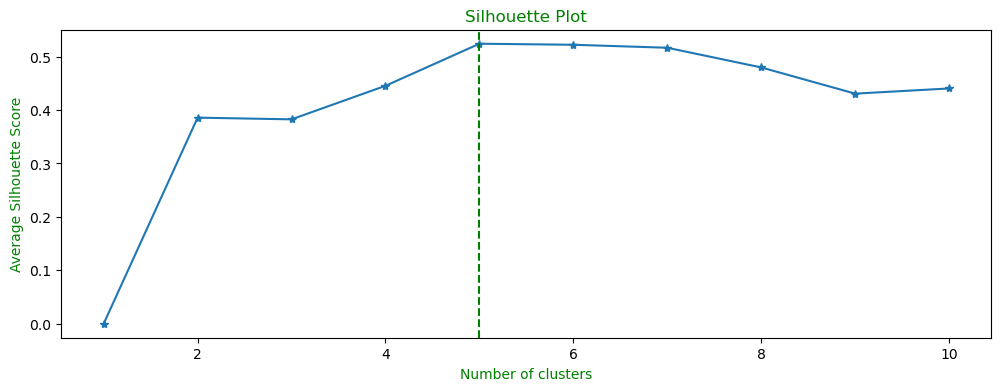

In [48]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(12,4)) 
plt.plot(list(ss.keys()),list(ss.values()),marker='*')
ax.axvline(x=maxkey, color="green", linestyle="--")
plt.title('Silhouette Plot',color='green')
plt.xlabel('Number of clusters',color='green')
plt.ylabel('Average Silhouette Score',color='green') 
plt.show()

**Part 1 -->1.8 Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].**

**Cluster Profiling**

In [49]:
ad_data_new.Clusters.value_counts().sort_index()

0    6524
1    4054
2    6275
3    4676
4    1537
Name: Clusters, dtype: int64

In [50]:
ad_data_new.groupby(['Clusters','Device Type']).mean()

Ad - Length   Ad- Width        Ad Size  \
Clusters Device Type                                           
0        Desktop       143.953846  571.132479   74011.538462   
         Mobile        142.904398  572.645793   73941.682600   
1        Desktop       463.317406  199.228669   72959.017065   
         Mobile        467.176516  199.103901   72966.720742   
2        Desktop       422.168761  152.109515   64275.026930   
         Mobile        421.436126  151.942179   64313.743514   
3        Desktop       685.085030  304.161677  100846.706587   
         Mobile        683.125749  303.576181  100736.526946   
4        Desktop       143.590664  568.581688   73777.378815   
         Mobile        140.240816  574.642857   73634.693878   

                      Available_Impressions  Matched_Queries   Impressions  \
Clusters Device Type                                                         
0        Desktop               3.257803e+04     1.987044e+04  1.371710e+04   
         Mobile                3.182261e+04     1.948626e+04  1.336617e+04   
1        Desktop               5.698971e+06     2.804062e+06  2.669356e+06   
         Mobile                5.693387e+06     2.807440e+06  2.672349e+06   
2        Desktop               1.789820e+06     8.576788e+05  8.199242e+05   
         Mobile                1.821597e+06     8.678868e+05  8.296875e+05   
3        Desktop               2.545487e+05     1.382438e+05  1.174109e+05   
         Mobile                2.495675e+05     1.371660e+05  1.164161e+05   
4        Desktop               8.021278e+05     5.653970e+05  4.770268e+05   
         Mobile                8.087159e+05     5.676979e+05  4.787861e+05   

                            Clicks        Spend       Fee      Revenue  \
Clusters Device Type                                                     
0        Desktop       1950.679487   209.291786  0.349983   136.091814   
         Mobile        1894.185946   209.090363  0.349990   135.938327   
1        Desktop      11312.535836  5717.075160  0.313440  3864.629505   
         Mobile       11207.966396  5751.919293  0.313190  3886.737602   
2        Desktop       3267.725314  1495.319825  0.349300   974.211859   
         Mobile        3260.603163  1502.717003  0.349244   979.192636   
3        Desktop      14285.340569  1251.027671  0.349545   814.675848   
         Mobile       14039.465777  1252.984401  0.349534   816.022933   
4        Desktop      30605.904847  6544.608151  0.305476  4469.211580   
         Mobile       30553.418622  6547.376388  0.305622  4473.233714   

                            CTR        CPM       CPC  
Clusters Device Type                                  
0        Desktop      15.851815  14.345118  0.102897  
         Mobile       15.746764  14.321643  0.102689  
1        Desktop       0.217558   1.561860  0.742680  
         Mobile        0.217063   1.579743  0.752105  
2        Desktop       0.408147   1.789589  0.523373  
         Mobile        0.402325   1.788258  0.530747  
3        Desktop      13.304351  11.668965  0.089394  
         Mobile       13.281544  11.762093  0.090356  
4        Desktop      13.793226  15.431593  0.111911  
         Mobile       13.729611  15.359699  0.111922

In [51]:
ad_data_new.groupby(['Clusters','Device Type']).mean()[['Clicks','Spend','Revenue','CPM','CTR','CPC']]

Clicks        Spend      Revenue        CPM  \
Clusters Device Type                                                      
0        Desktop       1950.679487   209.291786   136.091814  14.345118   
         Mobile        1894.185946   209.090363   135.938327  14.321643   
1        Desktop      11312.535836  5717.075160  3864.629505   1.561860   
         Mobile       11207.966396  5751.919293  3886.737602   1.579743   
2        Desktop       3267.725314  1495.319825   974.211859   1.789589   
         Mobile        3260.603163  1502.717003   979.192636   1.788258   
3        Desktop      14285.340569  1251.027671   814.675848  11.668965   
         Mobile       14039.465777  1252.984401   816.022933  11.762093   
4        Desktop      30605.904847  6544.608151  4469.211580  15.431593   
         Mobile       30553.418622  6547.376388  4473.233714  15.359699   

                            CTR       CPC  
Clusters Device Type                       
0        Desktop      15.851815  0.102897  
         Mobile       15.746764  0.102689  
1        Desktop       0.217558  0.742680  
         Mobile        0.217063  0.752105  
2        Desktop       0.408147  0.523373  
         Mobile        0.402325  0.530747  
3        Desktop      13.304351  0.089394  
         Mobile       13.281544  0.090356  
4        Desktop      13.793226  0.111911  
         Mobile       13.729611  0.111922

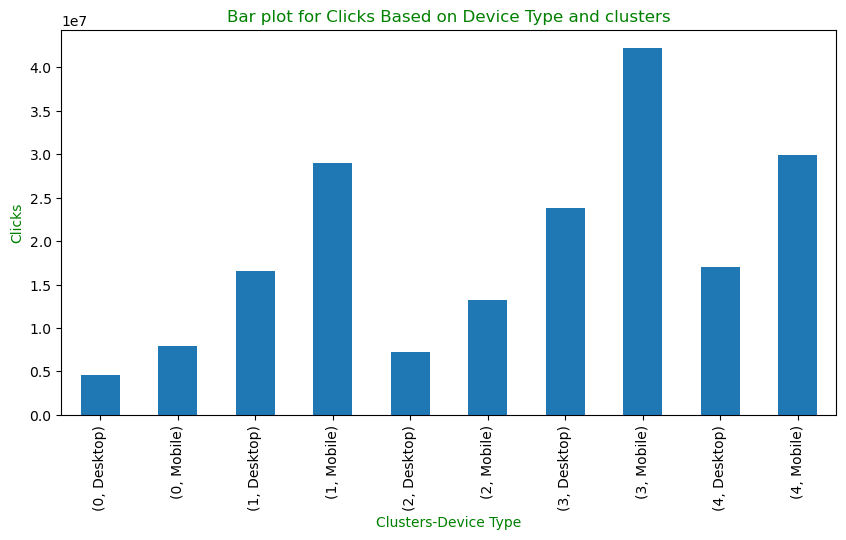

In [52]:
ad_data_new.groupby(['Clusters','Device Type']).sum()['Clicks'].plot(kind='bar',figsize=(10,5))
plt.title("Bar plot for Clicks Based on Device Type and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='green')
plt.ylabel("Clicks",color='green')
plt.show()

**Inference**

    * Maximum number of clicks is for cluster 3 followed by cluster 1 and 4 through Device Mobile.
    * Through Desktop maximum number of clicks is for cluster 3 followed by cluster 4 and 1.

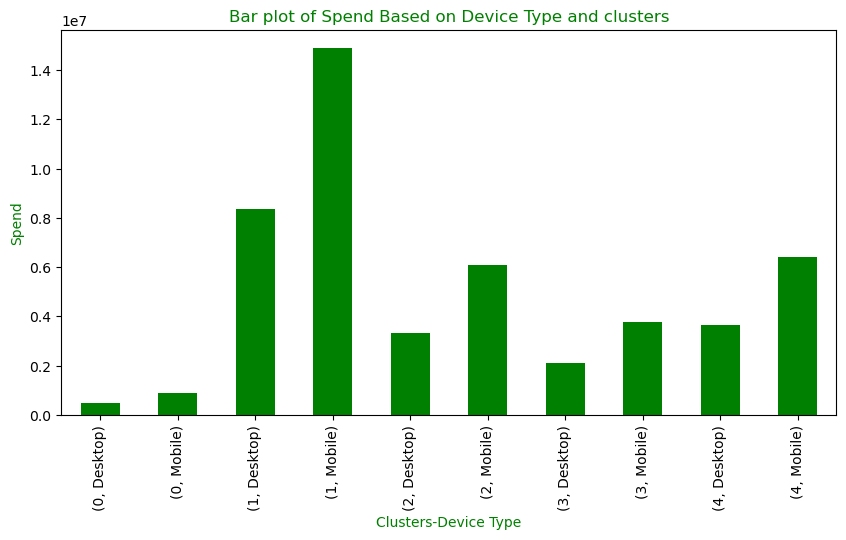

In [53]:
ad_data_new.groupby(['Clusters','Device Type']).sum()['Spend'].plot(kind='bar',figsize=(10,5),color='green')
plt.title("Bar plot of Spend Based on Device Type and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='green')
plt.ylabel("Spend",color='green')
plt.show()

**Inference**

    * Maximum number of Spend is for cluster 1 followed by cluster 2 and 4 through Device Mobile.
    * Through Desktop maximum number of Spend is for cluster 1 followed by cluster 4.

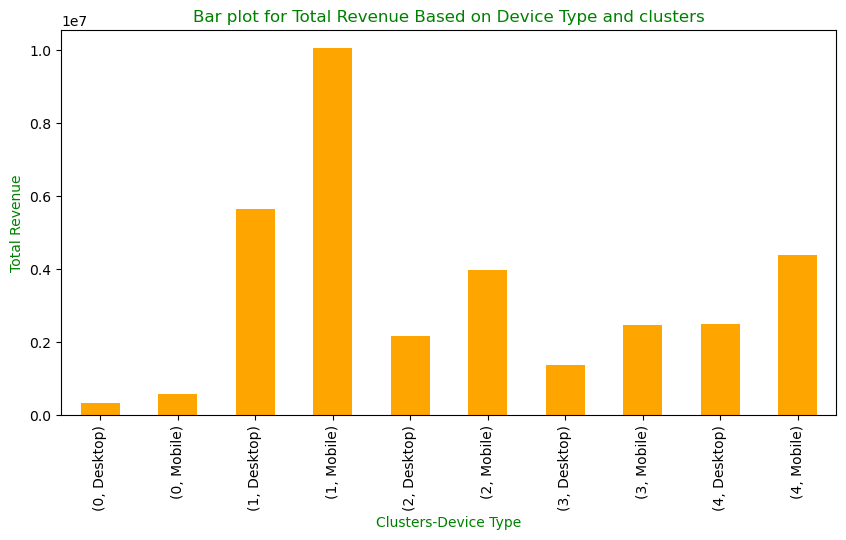

In [54]:
ad_data_new.groupby(['Clusters','Device Type']).sum()['Revenue'].plot(kind='bar',figsize=(10,5),color='orange')
plt.title("Bar plot for Total Revenue Based on Device Type and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='green')
plt.ylabel("Total Revenue",color='green')
plt.show()

**Inference**

    * Total Revenue generated is Maximum for cluster 1 followed by cluster 2 and 4 through Device             Mobile.
    * Through Desktop maximum Revenue generated is for cluster 1.

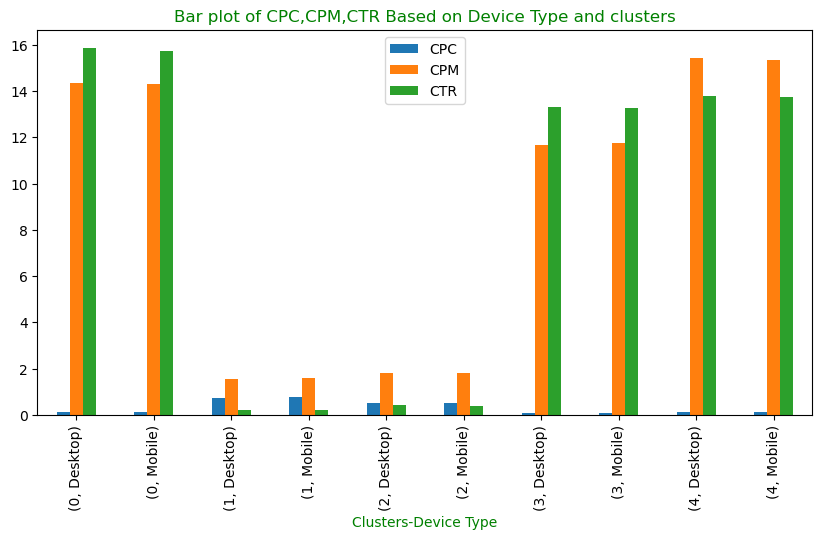

In [55]:
ad_data_new.groupby(['Clusters','Device Type']).mean()[['CPC','CPM','CTR']].plot(kind='bar',figsize=(10,5))
plt.title("Bar plot of CPC,CPM,CTR Based on Device Type and clusters",color='green')
plt.xlabel("Clusters-Device Type",color='green')
#plt.ylabel("Clicks",color='green')
plt.show()

**Inference**

    * CPM is High for cluster 3 followed by cluster 4.
    * CTR is High for cluster 1 followed by cluster 0.
    * CPC is High for cluster 1 and is negligible for other clusters.

**Part 1 --1.9 Clustering: Conclude the project by providing summary of your learnings.**

**summary of my learnings.**

* I have learned the concepts of Hierarchical and Non-Hierarchical clustering.
* Refreshed my concepts on EDA which forms the basis of any data analysis.
* Learned to impute missing values using a different approach i.e. using user-defined and lambda function.
* Learned the scaling technique and its effect on the performance on the clustering algorithm.
* We check for outliers, we can see there are outliers in the variables.
* Dendrogram is the visualization and linkage is for computing the distances and merging the clusters from n to 1.
* The output of Linkage is visualized by Dendrogram.
* In Hierarchical Clustering, I have used Dendrograms to identify the number of clusters using the Euclidean method and Wards Linkage.
* In Non Hierarchical clustering, k means has been applied to cluster the data using centroids and the variance within clusters is calculated.
* A WSS plot is also used to identify the optimum clusters. 
* Silhouette score is also used to identify optimum number of clusters.

#### Part 2 -->2.1 PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [3]:
census_data = pd.read_excel("PCA India Data_Census.xlsx")

In [4]:
# Checking 1st 5 Rows of the Dataset.
census_data.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [5]:
# Checking last 5 Rows of the Dataset.
census_data.tail()

State Code  Dist.Code                     State                Area Name  \
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[5 rows x 61 columns]

In [6]:
# Checking Shape of the Dataset.
census_data.shape

(640, 61)

In [82]:
# Checking info of the Dataset.
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [11]:
# Statistical Summary 
census_data.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

**Inference:**
* There is huge variation in values of data between Min aand Max ,showing the presence of Outliers in   tha data.
* Also tha Data is right Skewed.
* There are some features having minimun values as Zero.

In [87]:
# Checking for Duplicates:
dups=census_data.duplicated().sum()
print('Number of duplicate rows = %d' % (dups))

Number of duplicate rows = 0


In [58]:
# Checking for Null Values:
census_data.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

* There are no null values present in the dataset.

**Part 2 -->2.2 PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F**


**Calculating Gender Ratio**

In [7]:
census_data['Gender_Ratio'] = census_data['TOT_M']/census_data['TOT_F']

In [8]:
census_data.head(1)

State Code  Dist.Code            State Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir   Kupwara   7707  23388  29796   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0  5862  6196     3  ...            749            180            237   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0            680            252             32             46         258   

   NON_WORK_F  Gender_Ratio  
0         214      0.784938  

[1 rows x 62 columns]

In [85]:
census_data.groupby(['State','Area Name']).mean()['Gender_Ratio'].sort_values(ascending=False)

State            Area Name     
Lakshadweep      Lakshadweep       0.868061
Jammu & Kashmir  Badgam            0.847762
Uttar Pradesh    Mahamaya Nagar    0.847313
Rajasthan        Dhaulpur          0.846911
Uttar Pradesh    Baghpat           0.844003
                                     ...   
Odisha           Baudh             0.451455
Andhra Pradesh   West Godavari     0.450076
Tamil Nadu       Virudhunagar      0.449352
Odisha           Koraput           0.440769
Andhra Pradesh   Krishna           0.437972
Name: Gender_Ratio, Length: 640, dtype: float64

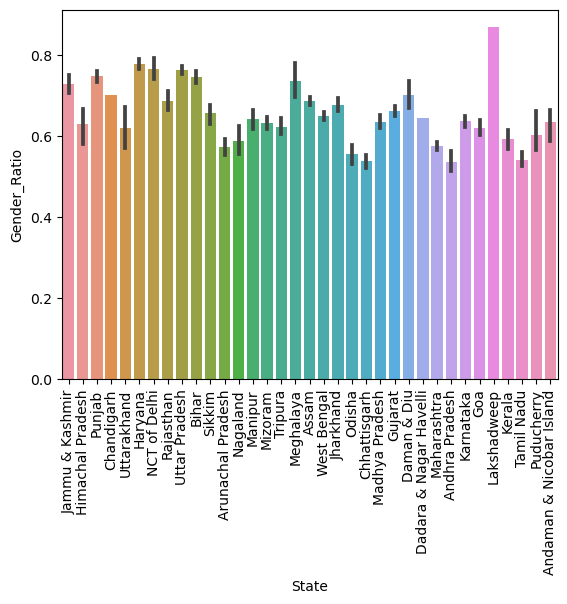

In [86]:
sns.barplot(data=census_data,x='State',y='Gender_Ratio')
plt.xticks(rotation=90);

**(i) Which state has highest gender ratio and which has the lowest?**



In [87]:
census_data.groupby('State').mean()['Gender_Ratio'].sort_values(ascending=False)

State
Lakshadweep                 0.868061
Haryana                     0.777742
NCT of Delhi                0.766436
Uttar Pradesh               0.762436
Punjab                      0.747843
Bihar                       0.746294
Meghalaya                   0.736105
Jammu & Kashmir             0.728013
Daman & Diu                 0.702191
Chandigarh                  0.700037
Rajasthan                   0.687548
Assam                       0.685665
Jharkhand                   0.677664
Gujarat                     0.662355
Sikkim                      0.657083
West Bengal                 0.649317
Dadara & Nagar Havelli      0.644631
Manipur                     0.641547
Karnataka                   0.636473
Madhya Pradesh              0.635514
Andaman & Nicobar Island    0.633861
Mizoram                     0.633117
Himachal Pradesh            0.628779
Tripura                     0.622312
Goa                         0.620158
Uttarakhand                 0.618892
Puducherry                  0.60

* From the Above plot and groupby function we can say that the state Lakshadweep has the Highest Gender Ratio of 86.8% and State Andhra Pradesh has the Lowest Gender Ration with 53.49%.


**(ii) Which district has the highest & lowest gender ratio?**

In [88]:
census_data.groupby(['Area Name']).mean()['Gender_Ratio'].sort_values(ascending=False)

Area Name
Lakshadweep       0.868061
Badgam            0.847762
Mahamaya Nagar    0.847313
Dhaulpur          0.846911
Baghpat           0.844003
                    ...   
Baudh             0.451455
West Godavari     0.450076
Virudhunagar      0.449352
Koraput           0.440769
Krishna           0.437972
Name: Gender_Ratio, Length: 635, dtype: float64

* From the above groupby function we can say that the Area/District Lakshadweep has the Highest Gender Ratio of 86.8% and District Krishna has the Lowest Gender Ration with 43.79%.

**Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F**

We pick the first 5 columns for the EDA Process.The columns are as follows:
* No_HH
* TOT_M
* TOT_F
* M_06
* F_06

**Let's Create the New dataset with the Following 5 Variables For the EDA Process.**


In [89]:
Eda_census = census_data[['No_HH','TOT_M','TOT_F','M_06','F_06']]

In [90]:
Eda_census.head()

No_HH  TOT_M  TOT_F  M_06  F_06
0   7707  23388  29796  5862  6196
1   6218  19585  23102  4482  3733
2   4452   6546  10964  1082  1018
3   1320   2784   4206   563   677
4  11654  20591  29981  5157  4587

In [91]:
# Statistical Summary:
Eda_census.describe().T

count           mean            std    min       25%      50%  \
No_HH  640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M  640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F  640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06   640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06   640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   

             75%       max  
No_HH   68892.00  310450.0  
TOT_M  107918.50  485417.0  
TOT_F  164251.75  750392.0  
M_06    16520.25   96223.0  
F_06    15902.25   95129.0

**Inference:**
* There is huge variation in values of data between Min and Max ,showing the presence of Outliers in     tha data.
* The above descriptive statistics tells us that there is skewness in the dataset.
* Also the spread of the data is large as the standard deviation is more.

**Univariate Analysis**

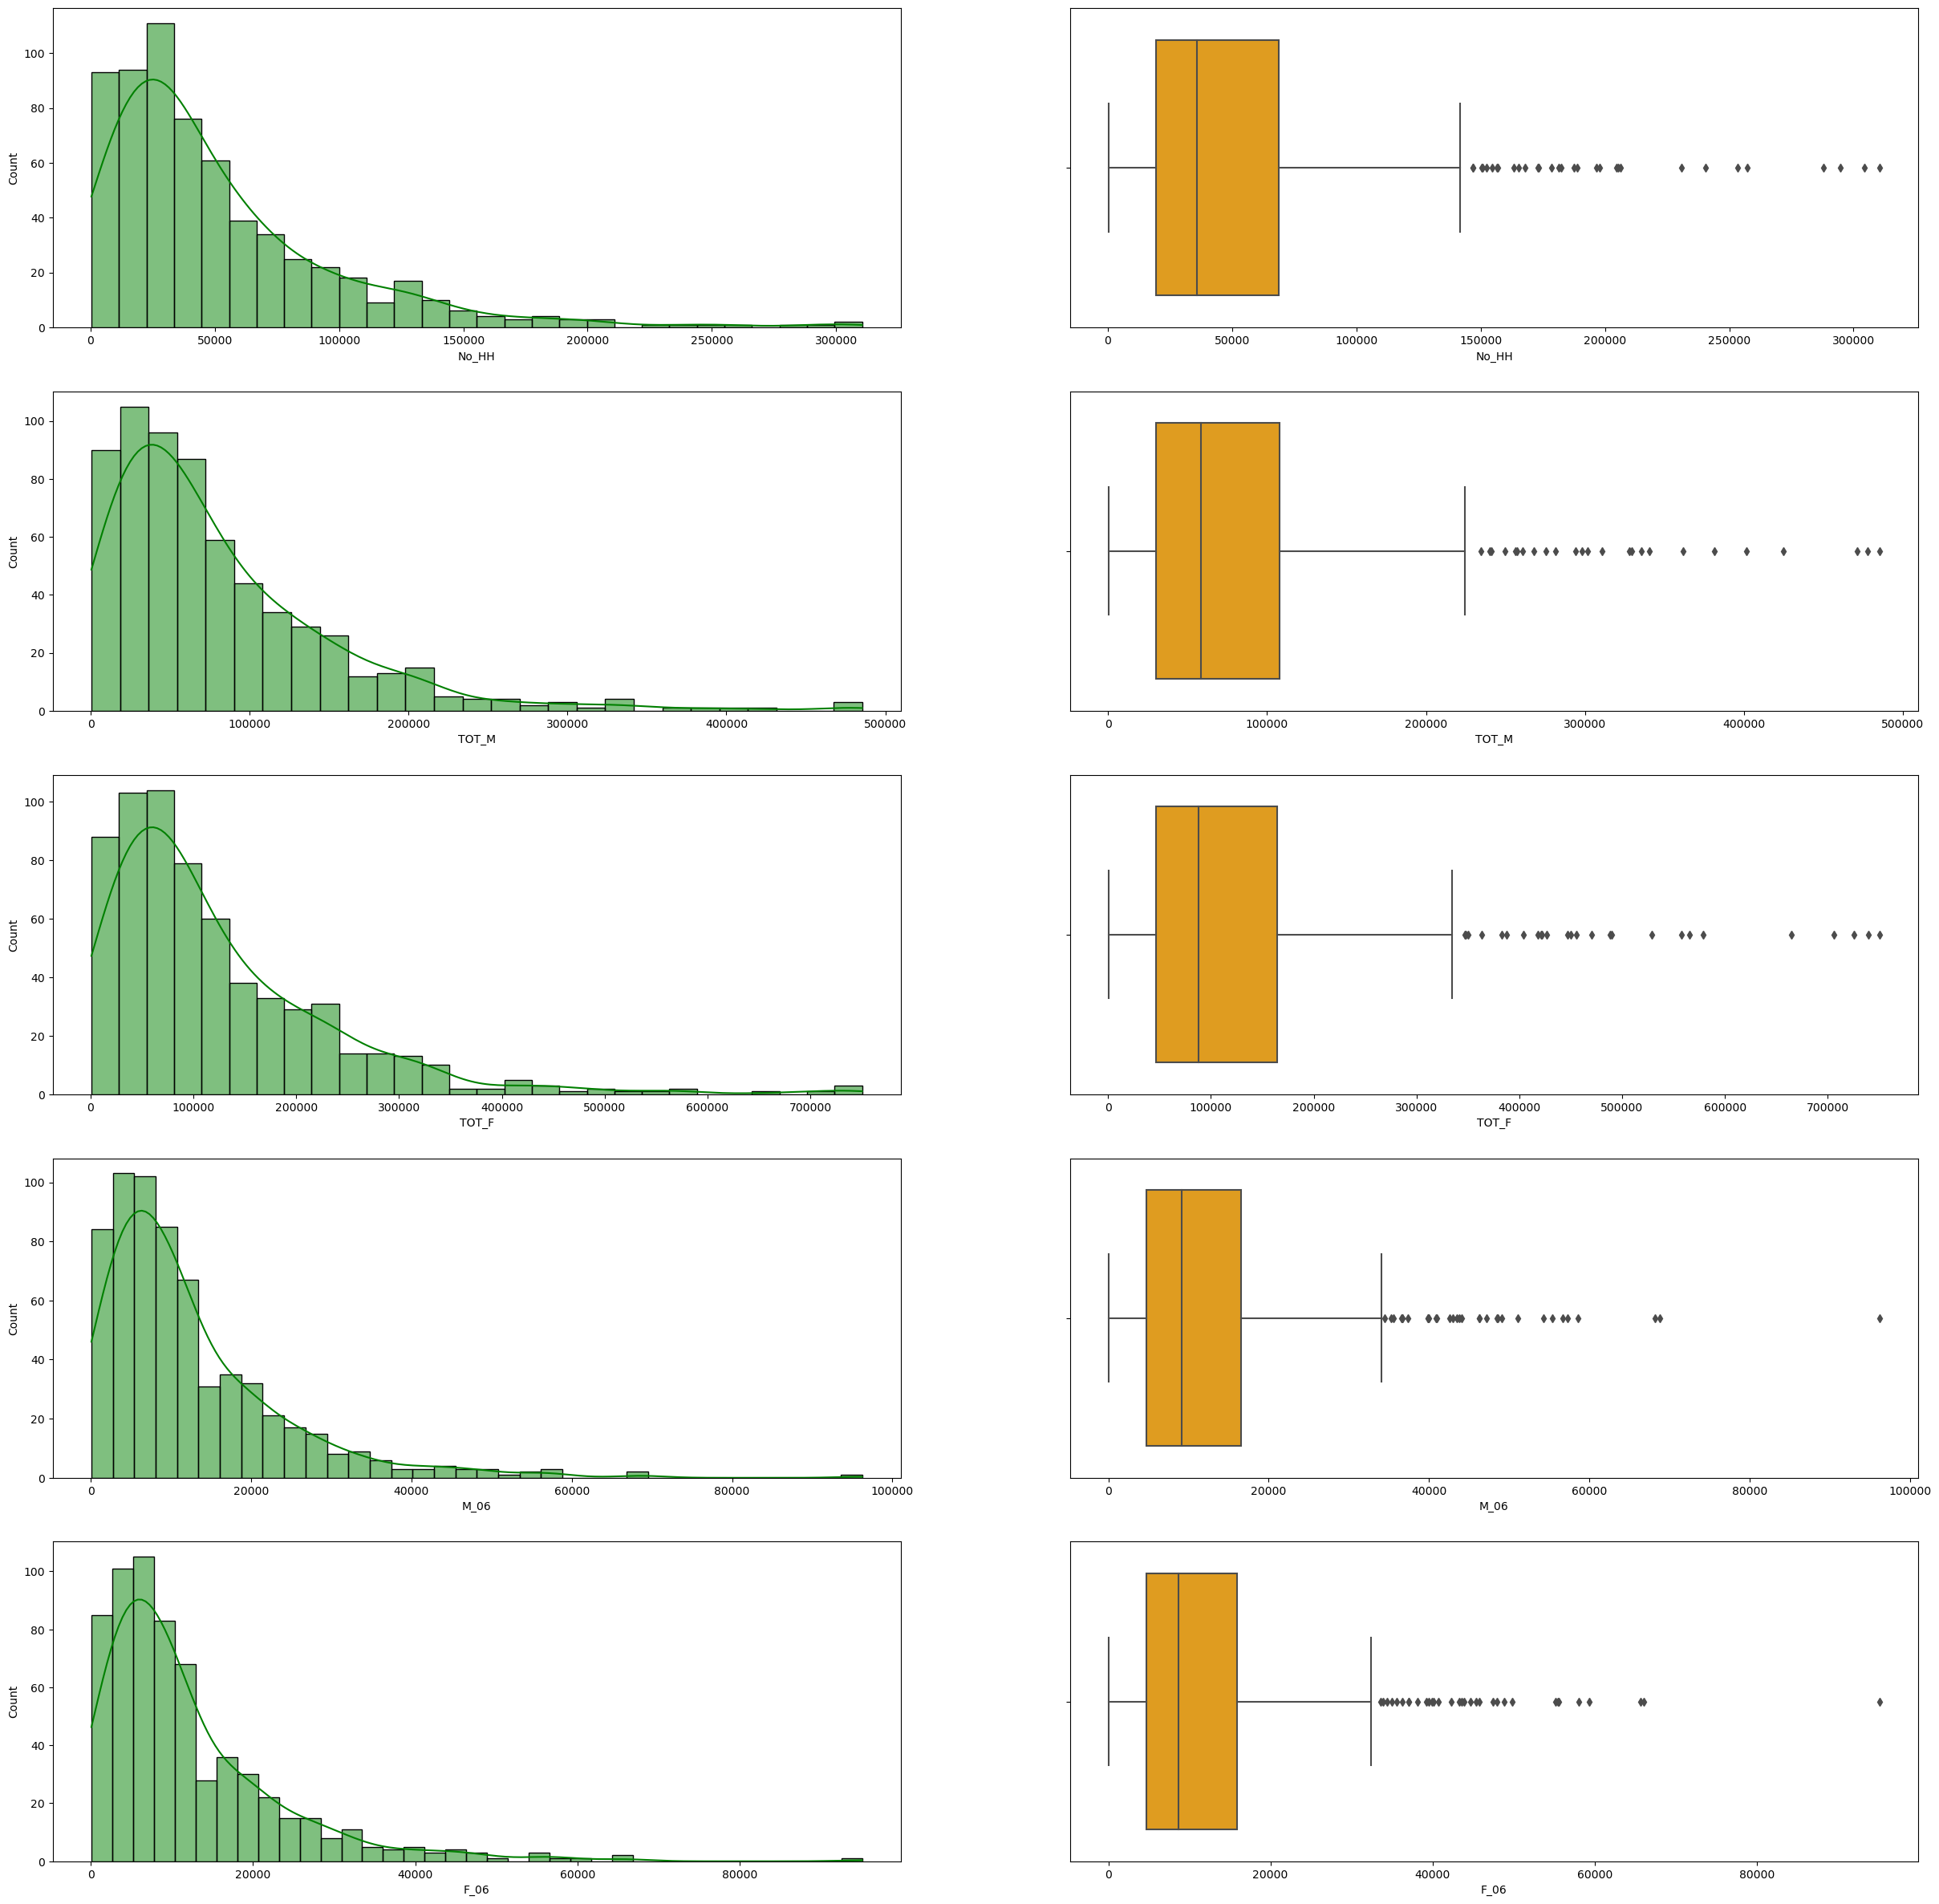

In [42]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(30,30)

sns.histplot(data=Eda_census,x='No_HH',kde=True,ax=axes[0][0],color='green')
sns.boxplot(data=Eda_census,x='No_HH',ax=axes[0][1],color='orange')
sns.histplot(data=Eda_census,x='TOT_M',kde=True,ax=axes[1][0],color='green')
sns.boxplot(data=Eda_census,x='TOT_M',ax=axes[1][1],color='orange')
sns.histplot(data=Eda_census,x='TOT_F',kde=True,ax=axes[2][0],color='green')
sns.boxplot(data=Eda_census,x='TOT_F',ax=axes[2][1],color='orange')
sns.histplot(data=Eda_census,x='M_06',kde=True,ax=axes[3][0],color='green')
sns.boxplot(data=Eda_census,x='M_06',ax=axes[3][1],color='orange')
sns.histplot(data=Eda_census,x='F_06',kde=True,ax=axes[4][0],color='green')
sns.boxplot(data=Eda_census,x='F_06',ax=axes[4][1],color='orange')

# plt.savefig("Pic_1.jpg")
plt.show()

**Insights**
* All the Variables are Right Skewed.
* Boxplot of all the Variables Shows the Presence of Outliers in the data.
* The Spread of the Data is also Large as Standard deviation is More.

**Bivariate Analysis**

* To check if the variables are Correlated we will compute Correlation Matrix..

In [92]:
corr_matrix=Eda_census.corr()
corr_matrix

No_HH     TOT_M     TOT_F      M_06      F_06
No_HH  1.000000  0.916170  0.970590  0.797559  0.796373
TOT_M  0.916170  1.000000  0.982640  0.950825  0.947792
TOT_F  0.970590  0.982640  1.000000  0.907975  0.906557
M_06   0.797559  0.950825  0.907975  1.000000  0.998151
F_06   0.796373  0.947792  0.906557  0.998151  1.000000

<Axes: >

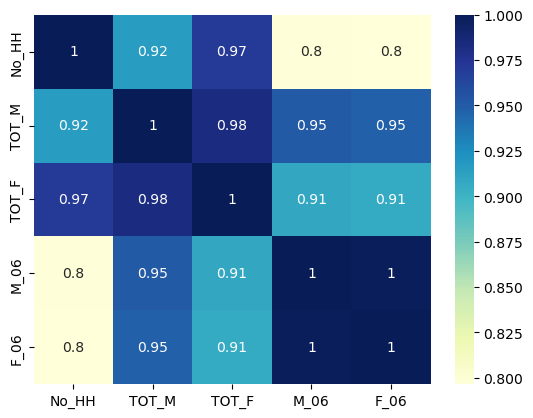

In [93]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

**Insights**
* From the heatmap above and the Correlation Matrix we can clearly say that there is a strong correlation among all the 5         variables and all the variables are positively correlated with each other.

**Multivariate Analysis**

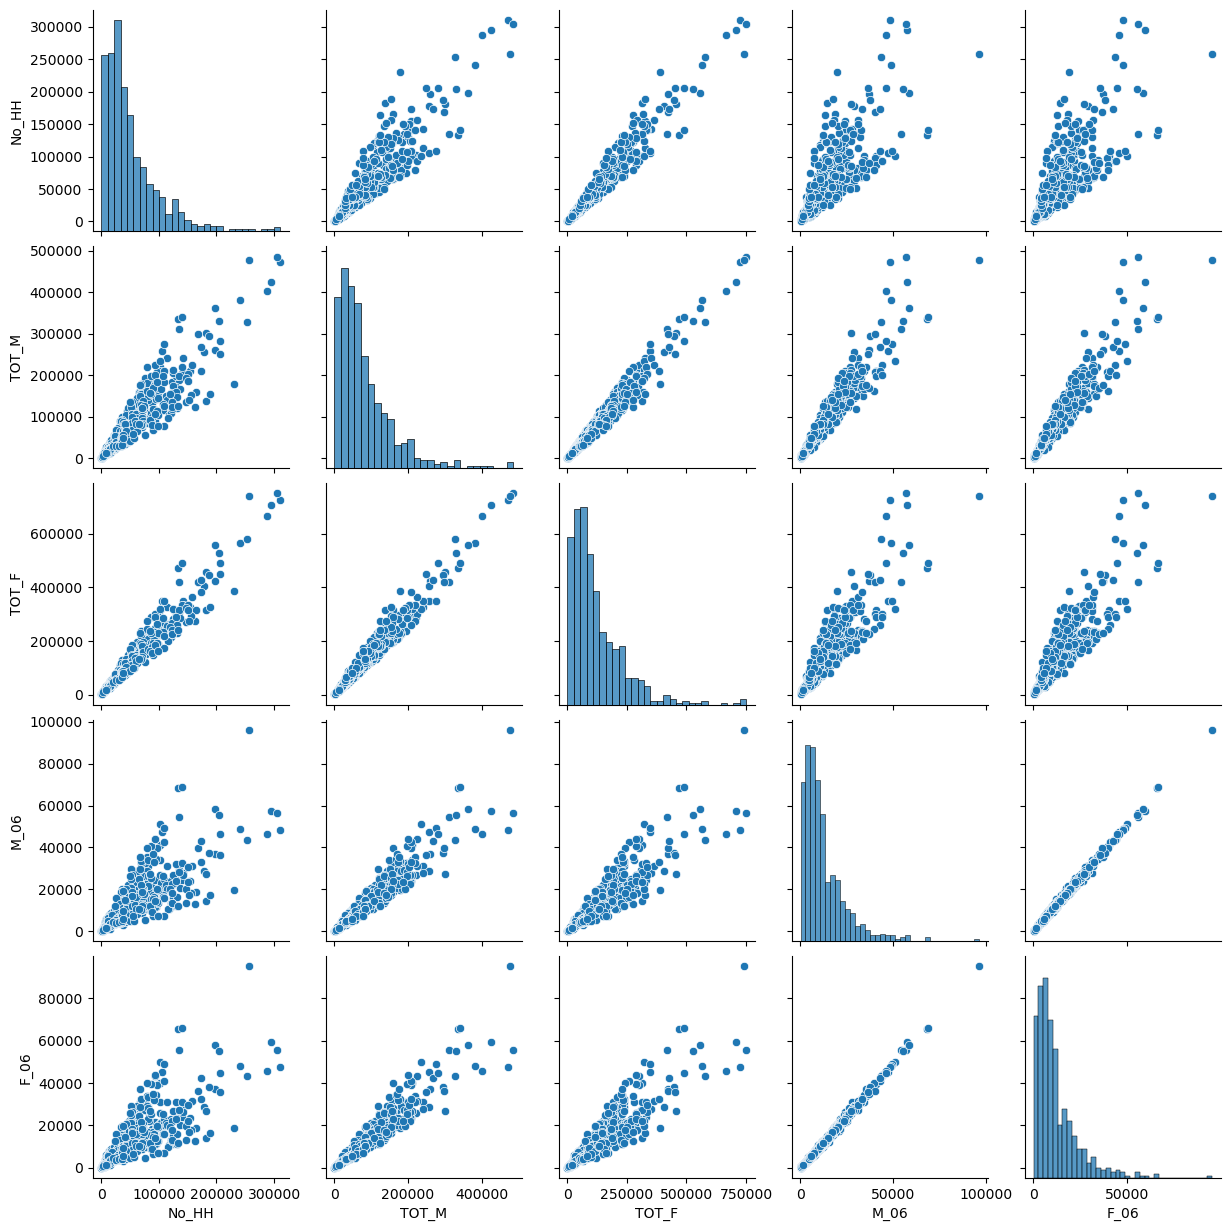

In [45]:
sns.pairplot(Eda_census)

**Insights**
* It is evident from the pair plot that the data is positively correlated as one variable increases the other also                  increases.

**Part 2 -->2.3 PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?**

* Yes,Outlier treatment is neccessary For Performing PCA

**Before prforming any PCA treatment we will first drop the columns that is not required for PCA analysis.**

In [9]:
pca_censusdata = census_data.drop(['State','Area Name','Gender_Ratio','State Code','Dist.Code'],axis=1)

In [10]:
pca_censusdata.head(1)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999  2598  13381  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           1150            749            180            237            680   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0            252             32             46         258         214  

[1 rows x 57 columns]

**Part 2 -->2.4PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.**

In [96]:
pca_censusdata.keys()

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

**Scaling the Data**

In [11]:
from scipy.stats import zscore
pca_scaled_census = pca_censusdata.apply(zscore)

In [12]:
# Check the data post Scaling
pca_scaled_census.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -0.904738 -0.771236 -0.815563 -0.561012 -0.507738 -0.958575 -0.957049   
1 -0.935695 -0.823100 -0.874534 -0.681096 -0.725367 -0.958297 -0.956772   
2 -0.972412 -1.000919 -0.981466 -0.976956 -0.965262 -0.958575 -0.956772   
3 -1.037530 -1.052224 -1.041001 -1.022118 -0.995393 -0.958783 -0.957049   
4 -0.822676 -0.809381 -0.813933 -0.622359 -0.649908 -0.957395 -0.955529   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.423306 -0.476423 -0.798097  ...      -0.163229      -0.720610   
1 -0.582014 -0.607607 -0.849434  ...      -0.583103      -0.732811   
2 -0.038951 -0.027273 -0.956457  ...      -0.859212      -0.921931   
3 -0.355965 -0.390060 -1.004643  ...      -0.805468      -0.900758   
4  0.149238  0.043330 -0.800568  ...      -0.348645      -0.297513   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.156494      -0.287524       0.156577      -0.657412      -0.365258   
1      -0.282327      -0.294688      -0.491731      -0.723062       0.042855   
2      -0.456727      -0.420050      -0.731894      -0.795026      -0.662068   
3      -0.419198      -0.385127      -0.718770      -0.784926      -0.624966   
4       0.472670       0.434200      -0.466796      -0.625849      -0.439461   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.499977   -0.413053   -0.539614  
1      -0.073481   -0.606455   -0.598988  
2      -0.635680   -0.726103   -0.707839  
3      -0.616294   -0.645791   -0.710038  
4      -0.309346   -0.540895   -0.249344  

[5 rows x 57 columns]

In [13]:
len(pca_censusdata.columns)

57

**Plot Boxplot of original data(unscaled data)**

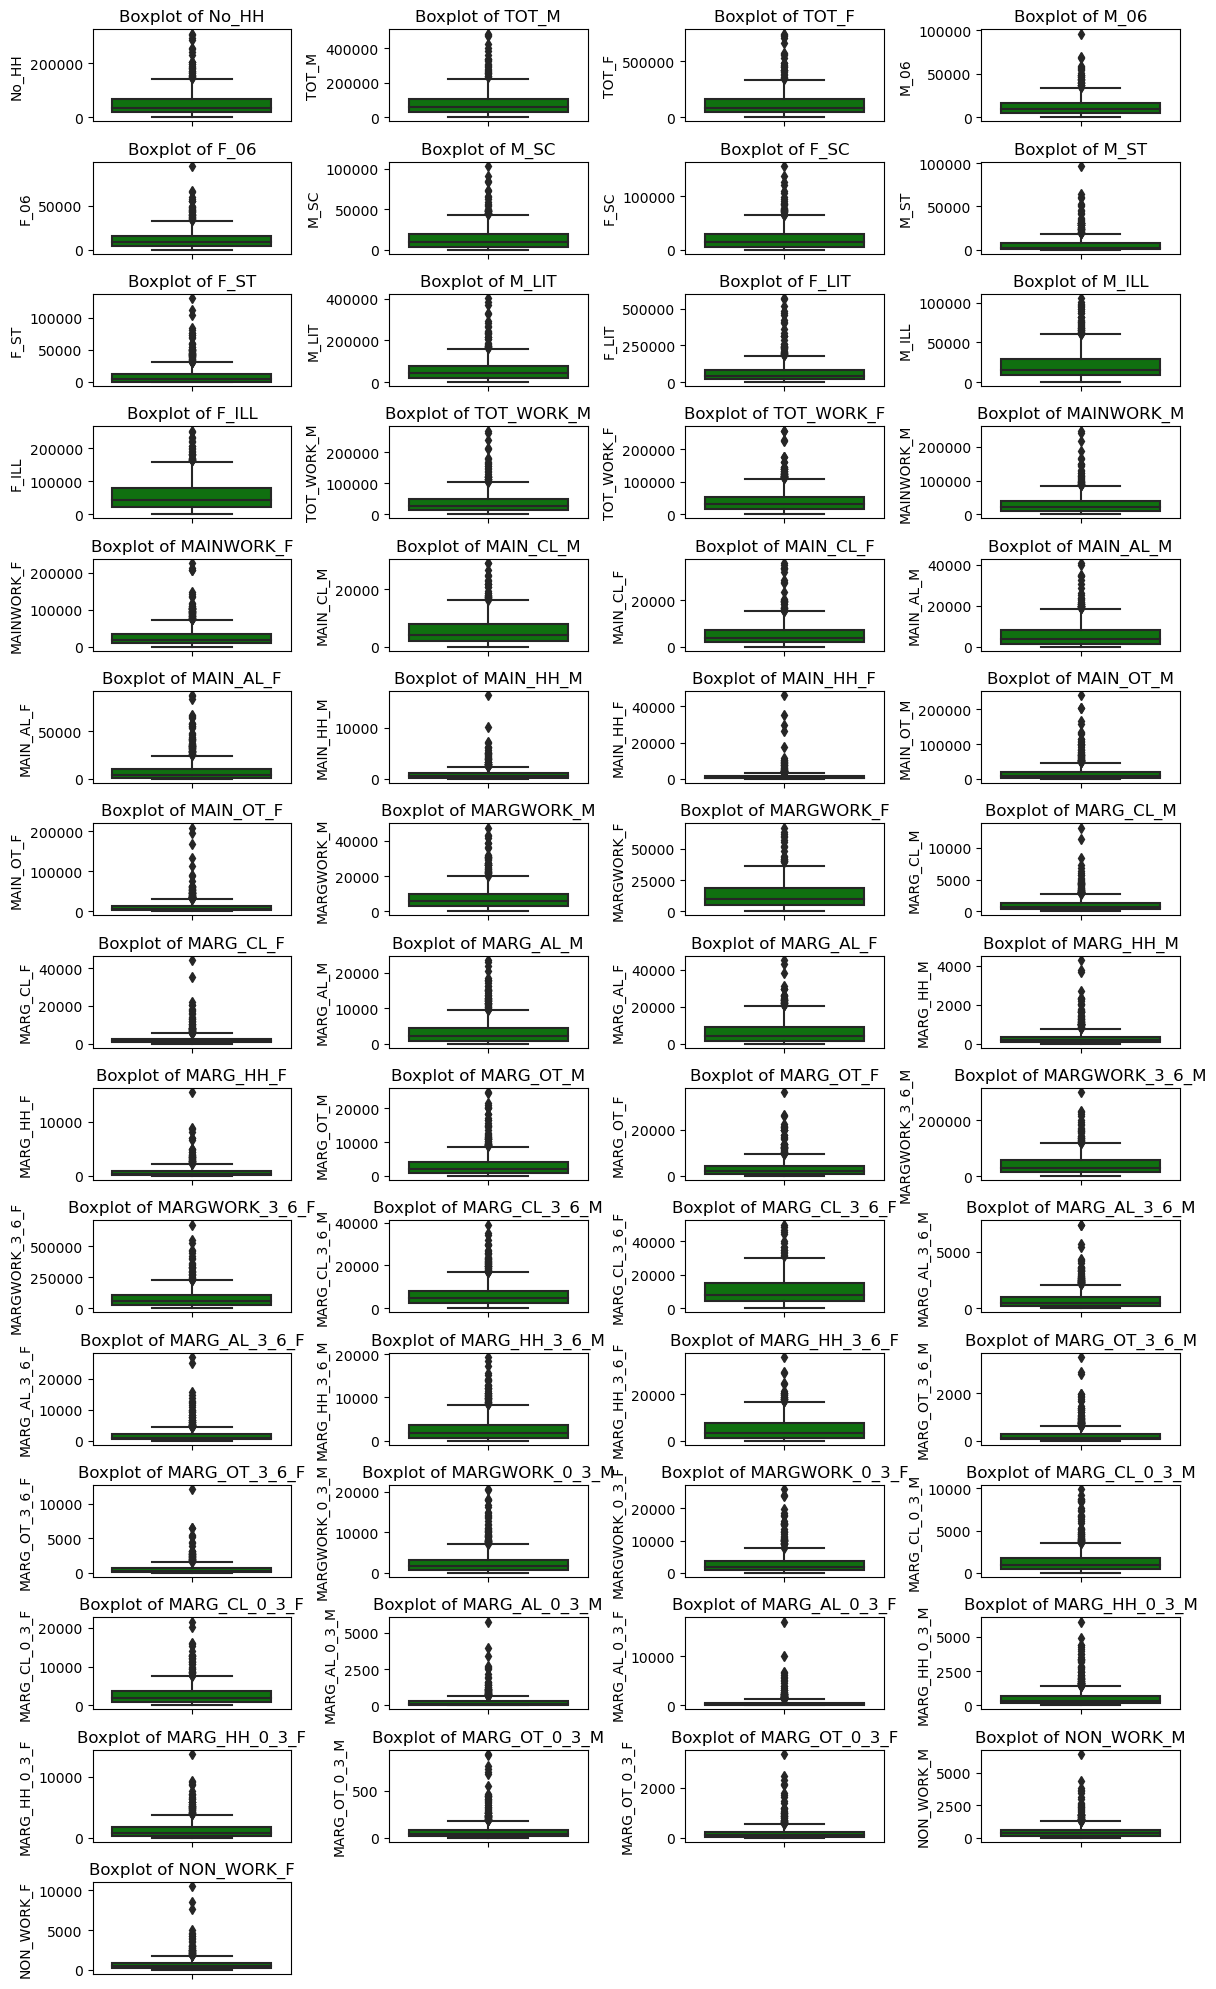

In [17]:
plt.figure(figsize=(12,20))
feature_list = pca_censusdata.columns
for i in range (len(feature_list)):
    plt.subplot(15,4,i+1)
    sns.boxplot(y=pca_censusdata[feature_list[i]],data=pca_censusdata,color='green')
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()
plt.savefig("Boxplot1.jpg")

                                  **Boxplot before scaling**

**Boxplot of Scaled Data**

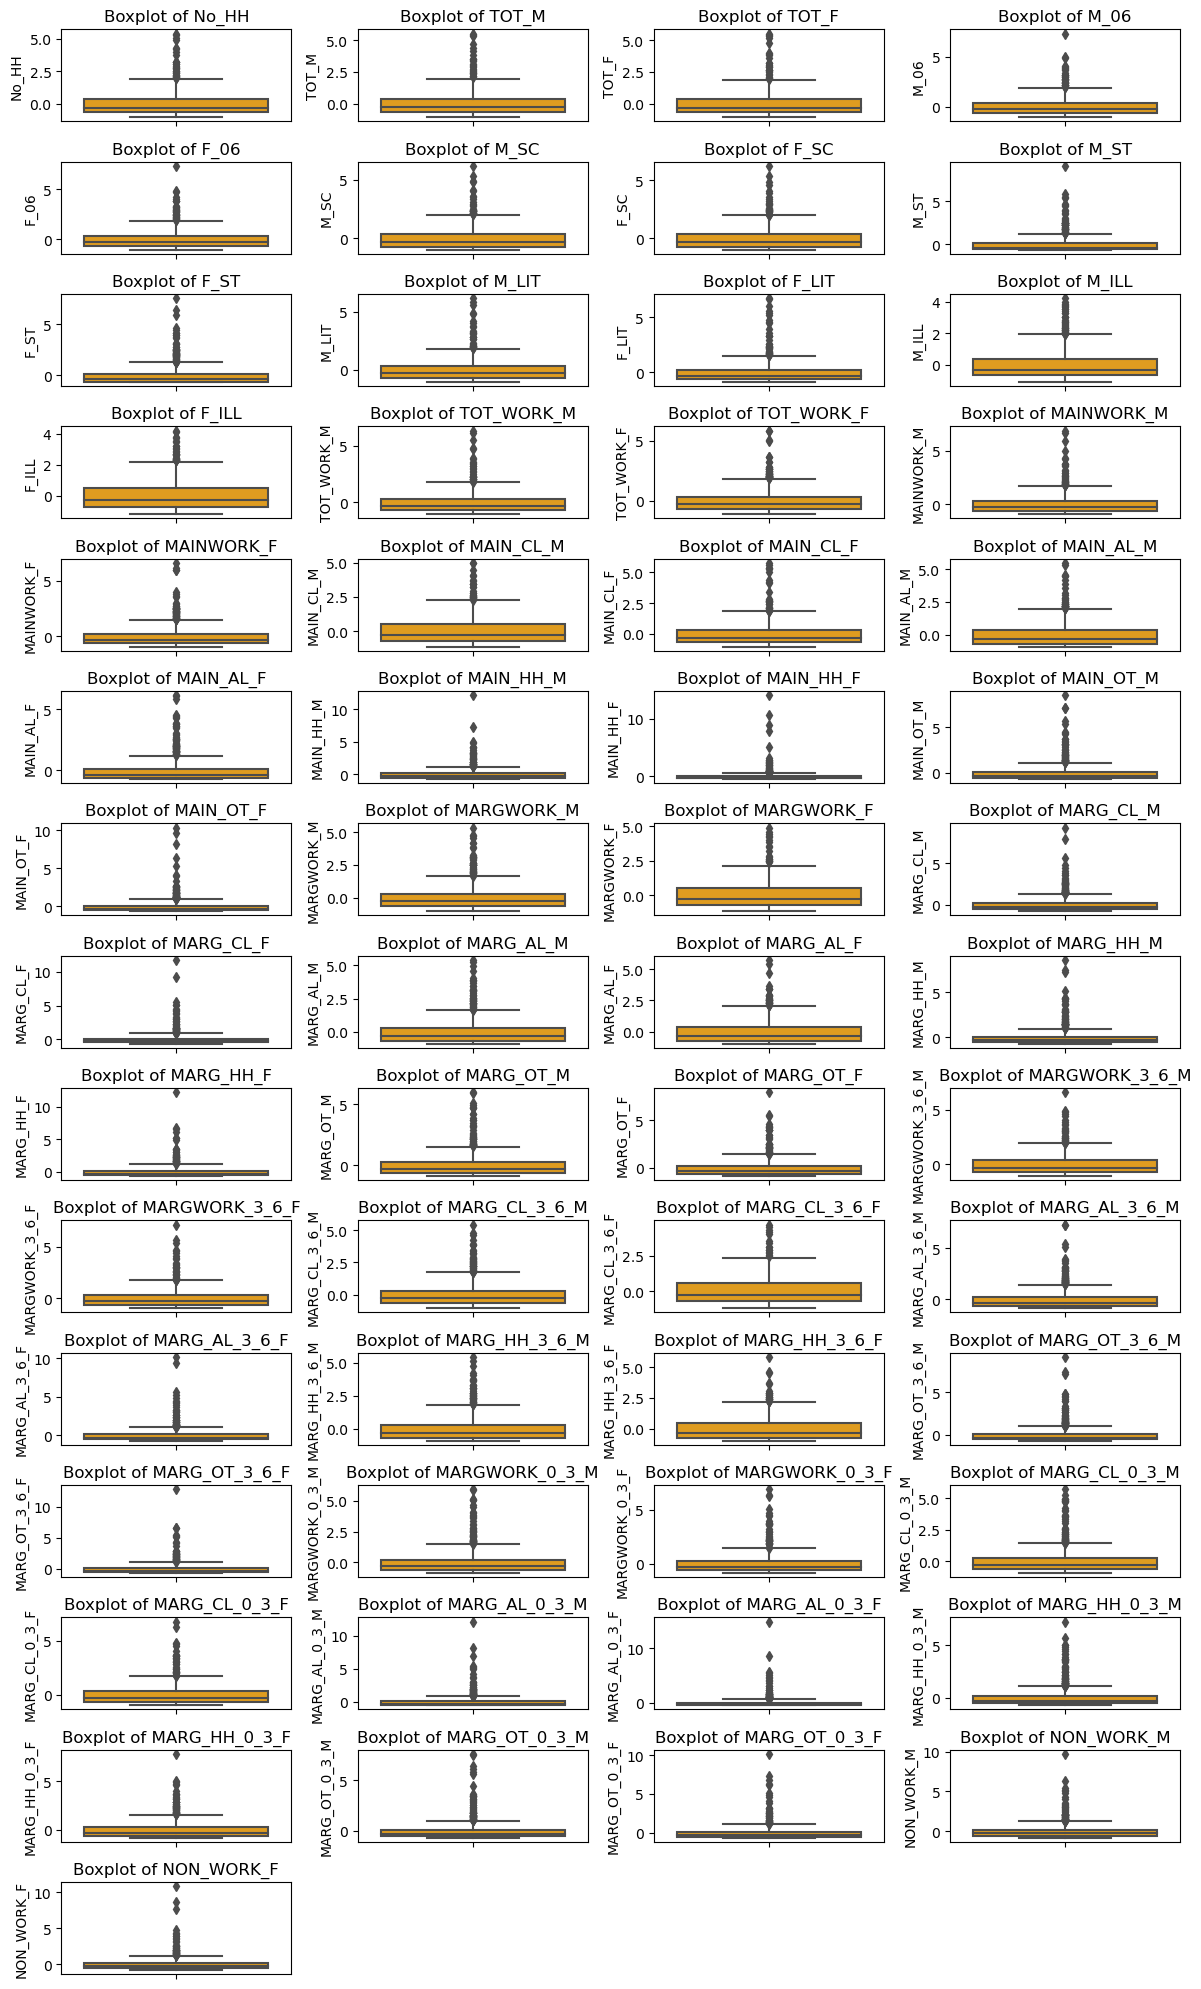

In [103]:
plt.figure(figsize=(12,20))
feature_list = pca_scaled_census.columns
for i in range (len(feature_list)):
    plt.subplot(15,4,i+1)
    sns.boxplot(y=pca_scaled_census[feature_list[i]],data=pca_scaled_census,color='orange')
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()
plt.savefig("Boxplot2.jpg")

                                    **Boxplot after Scaling**

**Observations**
* Scaling doesn't have any efffect on outliers as we can see that outliers are present in both the scaled and                      unscaled(original) datasets.
* Scaling just brings the data on the same scale for better calculation and Accuracy.
* It is necessary to treat outliers For PCA analysis.

**Part 2 -->2.5 PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.**

**Step 1: Outlier Treatment**

In [18]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [19]:
# Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL,UL = remove_outlier(pca_censusdata[i])
    pca_censusdata[i] = np.where(pca_censusdata[i] > UL,UL,pca_censusdata[i])
    pca_censusdata[i] = np.where(pca_censusdata[i] < LL,LL,pca_censusdata[i])

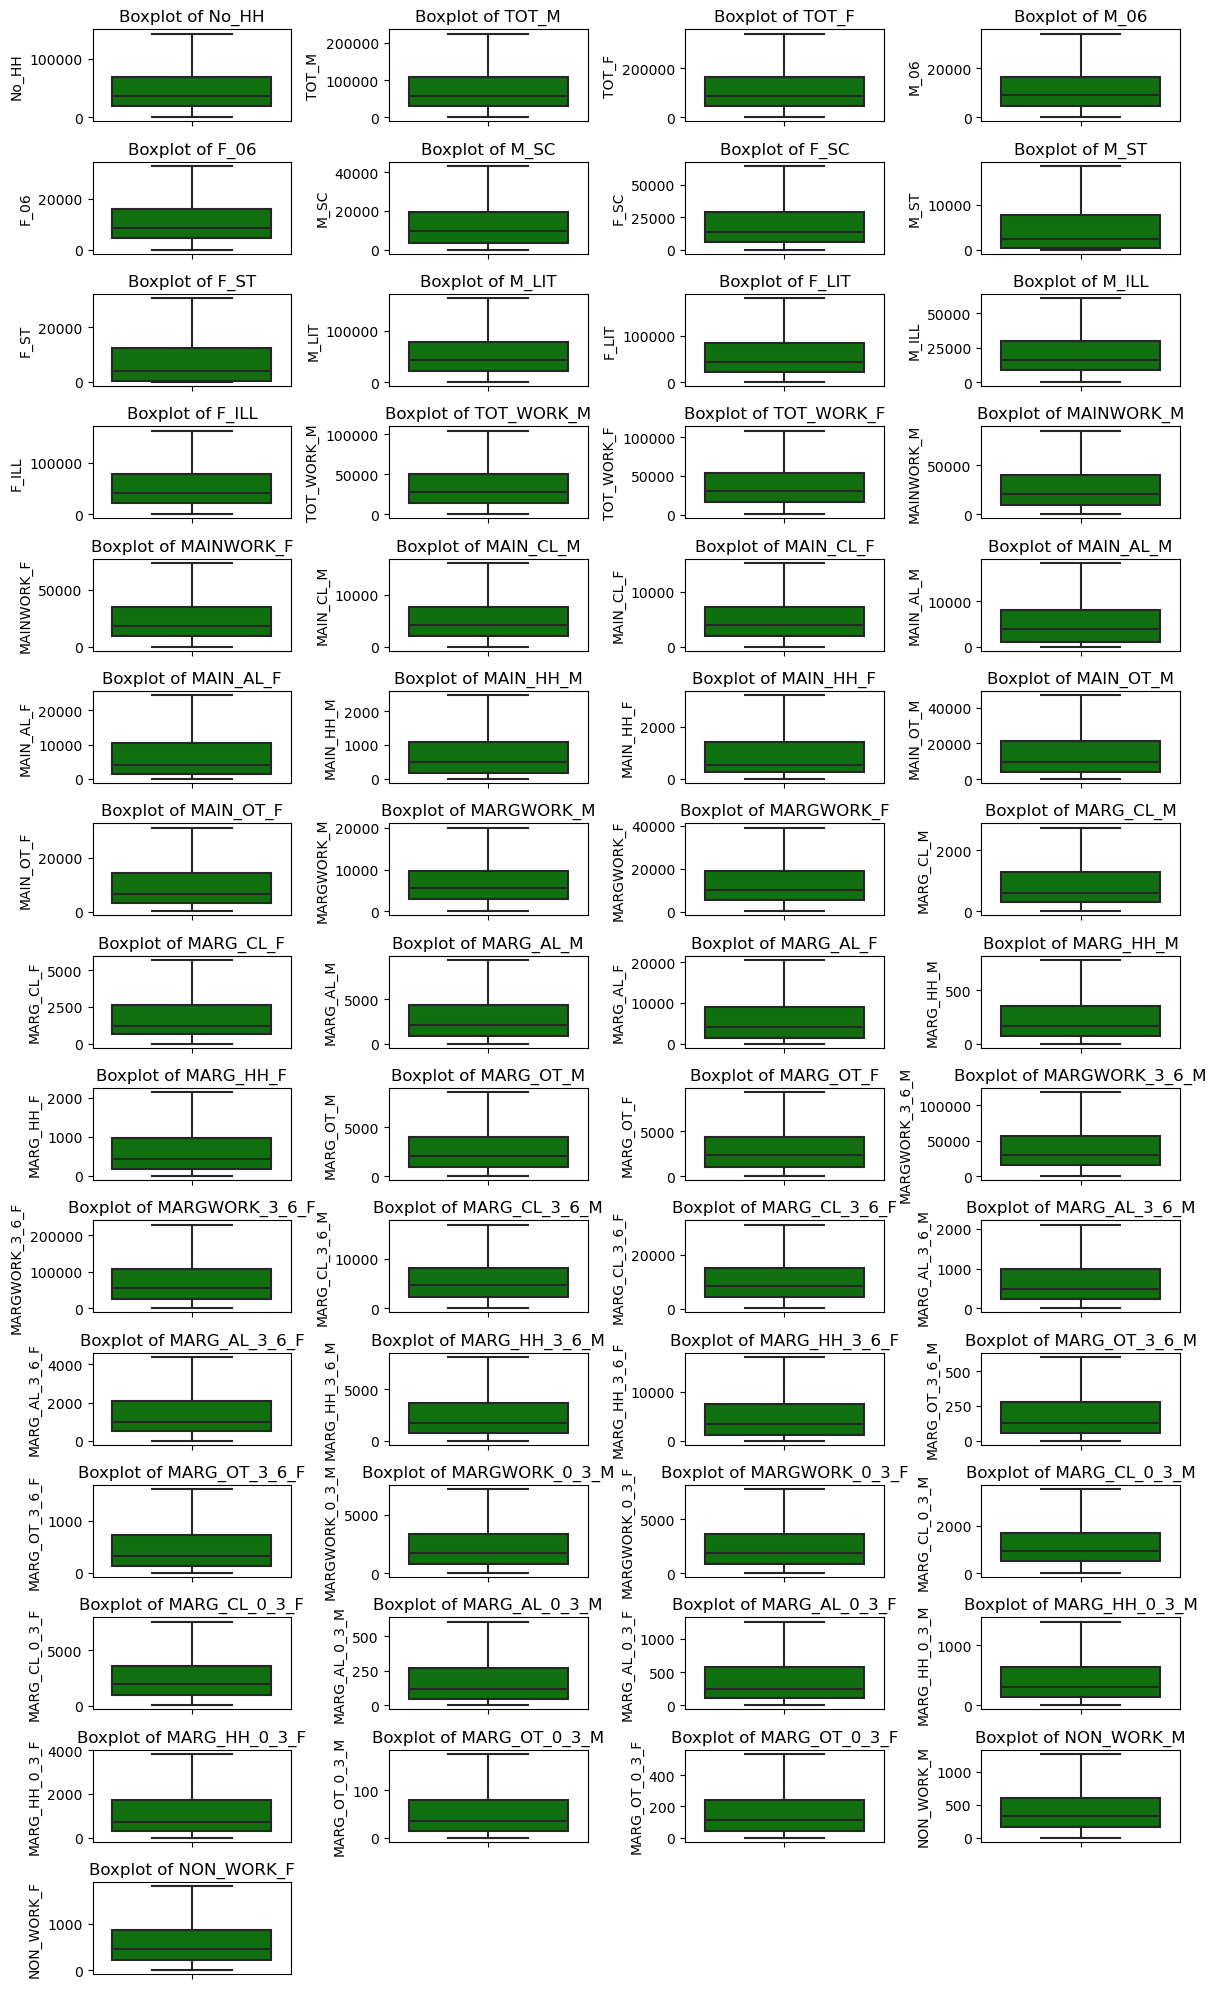

In [20]:
# Check to verify if outliers have been treated
plt.figure(figsize=(12,20))
feature_list = pca_censusdata.columns
for i in range (len(feature_list)):
    plt.subplot(15,4,i+1)
    sns.boxplot(y=pca_censusdata[feature_list[i]],data=pca_censusdata,color='green')
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()
plt.savefig("Boxplot3.jpg")

                               **Boxplot after Outlier Treatment**

**Step-2 Scale the Data**

In [21]:
from scipy.stats import zscore
pca_scaled_censusdata = pca_censusdata.apply(zscore)

In [22]:
pca_scaled_censusdata.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -0.510440 -0.574198 -0.939617  ...      -0.093587      -0.860882   
1 -0.771833 -0.782092 -1.005083  ...      -0.719169      -0.877096   
2  0.122588  0.137599 -1.141561  ...      -1.130551      -1.128423   
3 -0.399531 -0.437333 -1.203009  ...      -1.050477      -1.100286   
4  0.432534  0.249489 -0.942767  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 57 columns]

In [23]:
corr = pca_scaled_censusdata.corr(method='pearson')

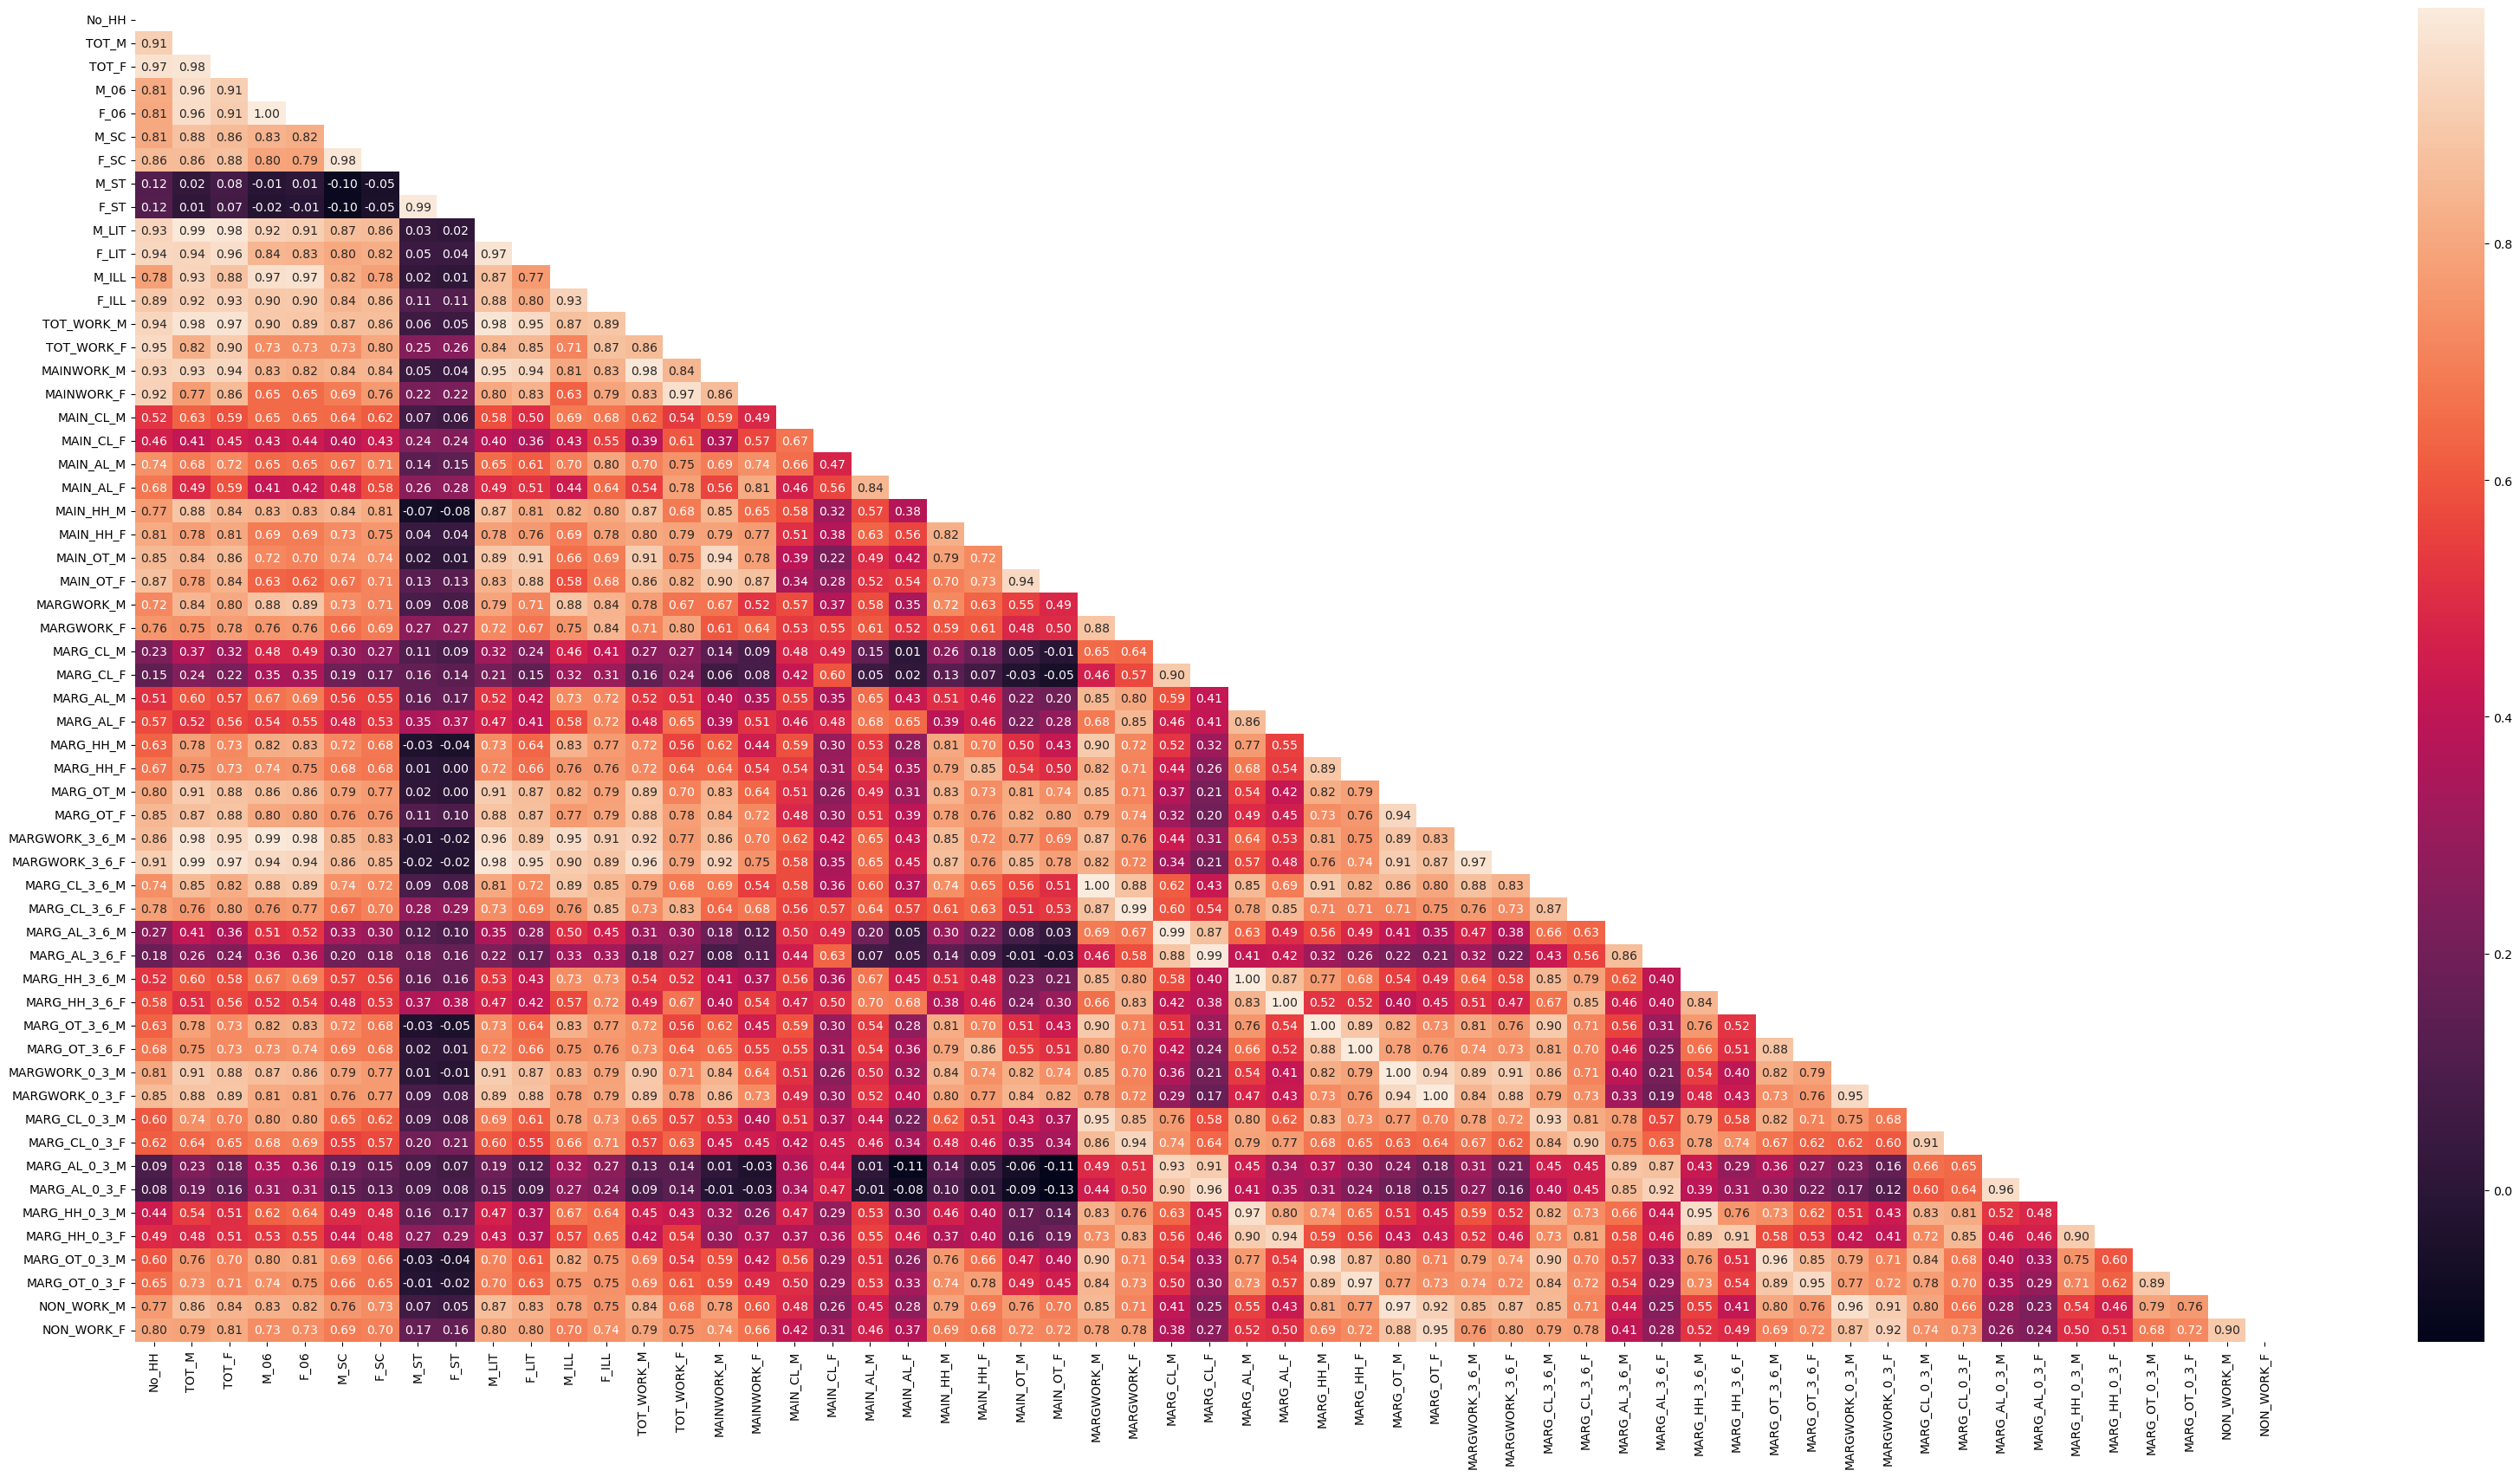

<Figure size 640x480 with 0 Axes>

In [24]:
# Check for presence of correlations
#plt.figure(figsize = (80,80))
#sns.heatmap(pca_scaled_censusdata.corr(), annot=True,fmt='.2f');
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(40,20))
sns.heatmap(pca_scaled_censusdata.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()
plt.savefig("Heatmap1.jpg")

In [25]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
import statsmodels.api as sm
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(pca_scaled_censusdata)
p_value


0.0

since p_value < 0.05 we can say that there are Significant Correlations in the data.

In [26]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all , kmo_model = calculate_kmo(pca_scaled_censusdata)
kmo_model

0.9361896166652854

* since kmo_model value > 0.7, We have adequate sample to procedd with analysis.

**Step-3 Find the Covariance Matrix**


In [27]:
# Find new variance-covariance matrix of the transformed variables
np.round(pca_scaled_censusdata.cov(),2)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  \
No_HH            1.00   0.91   0.97  0.81  0.81  0.81  0.86  0.12  0.12   
TOT_M            0.91   1.00   0.98  0.97  0.96  0.88  0.86  0.02  0.01   
TOT_F            0.97   0.98   1.00  0.91  0.91  0.86  0.88  0.08  0.07   
M_06             0.81   0.97   0.91  1.00  1.00  0.83  0.80 -0.01 -0.02   
F_06             0.81   0.96   0.91  1.00  1.00  0.82  0.79  0.01 -0.01   
M_SC             0.81   0.88   0.86  0.83  0.82  1.00  0.98 -0.10 -0.10   
F_SC             0.86   0.86   0.88  0.80  0.79  0.98  1.00 -0.05 -0.05   
M_ST             0.12   0.02   0.08 -0.01  0.01 -0.10 -0.05  1.00  0.99   
F_ST             0.12   0.01   0.07 -0.02 -0.01 -0.10 -0.05  0.99  1.00   
M_LIT            0.93   0.99   0.98  0.92  0.92  0.87  0.86  0.03  0.02   
F_LIT            0.94   0.94   0.96  0.84  0.84  0.81  0.82  0.05  0.04   
M_ILL            0.78   0.93   0.88  0.97  0.97  0.82  0.78  0.02  0.01   
F_ILL            0.90   0.92   0.93  0.90  0.90  0.84  0.86  0.11  0.11   
TOT_WORK_M       0.94   0.98   0.97  0.90  0.89  0.87  0.87  0.06  0.05   
TOT_WORK_F       0.95   0.83   0.90  0.73  0.73  0.73  0.80  0.25  0.26   
MAINWORK_M       0.93   0.94   0.94  0.83  0.83  0.84  0.84  0.05  0.04   
MAINWORK_F       0.92   0.77   0.86  0.65  0.65  0.69  0.76  0.22  0.22   
MAIN_CL_M        0.52   0.63   0.59  0.65  0.65  0.65  0.62  0.07  0.06   
MAIN_CL_F        0.46   0.41   0.45  0.43  0.44  0.40  0.44  0.25  0.24   
MAIN_AL_M        0.74   0.68   0.72  0.65  0.66  0.67  0.71  0.14  0.15   
MAIN_AL_F        0.68   0.49   0.59  0.42  0.42  0.48  0.58  0.26  0.28   
MAIN_HH_M        0.77   0.88   0.84  0.83  0.83  0.84  0.81 -0.07 -0.08   
MAIN_HH_F        0.81   0.78   0.81  0.69  0.69  0.73  0.76  0.04  0.04   
MAIN_OT_M        0.85   0.84   0.86  0.72  0.70  0.74  0.74  0.02  0.01   
MAIN_OT_F        0.87   0.78   0.84  0.63  0.62  0.67  0.71  0.13  0.14   
MARGWORK_M       0.72   0.84   0.81  0.88  0.89  0.73  0.71  0.09  0.08   
MARGWORK_F       0.76   0.75   0.78  0.76  0.76  0.66  0.69  0.27  0.27   
MARG_CL_M        0.23   0.37   0.32  0.48  0.49  0.30  0.27  0.11  0.09   
MARG_CL_F        0.15   0.24   0.22  0.35  0.35  0.19  0.17  0.16  0.14   
MARG_AL_M        0.51   0.60   0.57  0.67  0.69  0.56  0.55  0.16  0.17   
MARG_AL_F        0.57   0.52   0.56  0.54  0.55  0.48  0.53  0.35  0.37   
MARG_HH_M        0.63   0.78   0.73  0.82  0.83  0.72  0.68 -0.03 -0.04   
MARG_HH_F        0.68   0.75   0.73  0.74  0.75  0.69  0.68  0.01  0.00   
MARG_OT_M        0.81   0.91   0.88  0.86  0.86  0.79  0.77  0.02  0.00   
MARG_OT_F        0.85   0.87   0.88  0.80  0.80  0.76  0.76  0.11  0.10   
MARGWORK_3_6_M   0.86   0.98   0.95  0.99  0.98  0.85  0.83 -0.01 -0.02   
MARGWORK_3_6_F   0.91   0.99   0.98  0.95  0.94  0.86  0.85 -0.02 -0.02   
MARG_CL_3_6_M    0.74   0.86   0.82  0.89  0.90  0.74  0.72  0.09  0.08   
MARG_CL_3_6_F    0.78   0.76   0.80  0.76  0.77  0.67  0.71  0.28  0.29   
MARG_AL_3_6_M    0.27   0.41   0.36  0.51  0.52  0.33  0.30  0.12  0.10   
MARG_AL_3_6_F    0.18   0.26   0.24  0.36  0.36  0.20  0.19  0.18  0.16   
MARG_HH_3_6_M    0.52   0.61   0.58  0.67  0.69  0.57  0.56  0.16  0.16   
MARG_HH_3_6_F    0.58   0.51   0.56  0.52  0.54  0.48  0.53  0.37  0.39   
MARG_OT_3_6_M    0.63   0.78   0.73  0.82  0.83  0.72  0.68 -0.03 -0.05   
MARG_OT_3_6_F    0.68   0.75   0.73  0.73  0.74  0.69  0.68  0.02  0.01   
MARGWORK_0_3_M   0.81   0.91   0.88  0.87  0.86  0.80  0.77  0.01 -0.01   
MARGWORK_0_3_F   0.86   0.88   0.89  0.81  0.81  0.77  0.77  0.09  0.08   
MARG_CL_0_3_M    0.60   0.74   0.70  0.80  0.81  0.65  0.62  0.09  0.08   
MARG_CL_0_3_F    0.62   0.64   0.65  0.68  0.69  0.55  0.57  0.20  0.21   
MARG_AL_0_3_M    0.09   0.23   0.19  0.35  0.36  0.19  0.15  0.09  0.07   
MARG_AL_0_3_F    0.08   0.19   0.16  0.31  0.31  0.15  0.13  0.09  0.08   
MARG_HH_0_3_M    0.44   0.54   0.51  0.62  0.64  0.49  0.48  0.16  0.17   
MARG_HH_0_3_F    0.49   0.48   0.51  0.53

* Note that all variances are now 1 (main diagonal). In fact, this matrix is same as the correlation matrix of the original (unscaled) variables.

**Step-4 Perform Eigen decomposition**

In [28]:
# Apply PCA taking all features..
from sklearn.decomposition import PCA
pca = PCA(n_components = 57, random_state = 123)
pca_transformed = pca.fit_transform(pca_scaled_censusdata)

In [53]:
pca_transformed

array([[-5.52816148e+00,  4.30377559e-01, -1.47382695e+00, ...,
         6.51060294e-03,  2.38391484e-03,  4.36606130e-04],
       [-5.49201646e+00, -1.06110331e-01, -2.01564100e+00, ...,
        -2.82839348e-04,  8.13609312e-03, -6.60428796e-03],
       [-7.47464297e+00, -2.17193764e-01, -2.47428211e-01, ...,
        -1.35201718e-03, -1.10109765e-03,  8.64566393e-05],
       ...,
       [-7.88626804e+00, -1.00353656e+00, -9.09284569e-01, ...,
        -2.15313673e-03,  1.45549207e-03, -4.60053251e-04],
       [-7.86425952e+00, -9.99337996e-01, -8.51569237e-01, ...,
        -2.06885382e-03, -1.22502335e-03,  1.81303381e-03],
       [-7.41622568e+00, -1.41214300e+00, -8.65921210e-01, ...,
        -1.06417476e-03, -1.66377584e-03,  1.78275792e-03]])

In [29]:
# Extract eigen vectors..
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921, ...,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, ...,  0.03510934,
        -0.04912234, -0.03984815],
       [ 0.1015276 , -0.03866173,  0.0289595 , ..., -0.10217491,
        -0.12667281, -0.02854464],
       ...,
       [ 0.00112879, -0.00673066,  0.02298648, ..., -0.01159627,
         0.05608352, -0.00610478],
       [ 0.00070908,  0.04637872,  0.00402434, ...,  0.01406358,
        -0.07729171, -0.00056173],
       [-0.00461221, -0.00370327,  0.00963954, ...,  0.00227908,
         0.00539901,  0.00130606]])

In [30]:
# Check the eigen values..
# Note: This is always returned in descending order
pca.explained_variance_

array([3.56488638e+01, 7.64357559e+00, 3.76919551e+00, 2.77722349e+00,
       1.90694892e+00, 1.15490310e+00, 9.87726707e-01, 4.64629906e-01,
       3.96708513e-01, 3.22346888e-01, 2.73207369e-01, 2.35647574e-01,
       1.81401107e-01, 1.69243770e-01, 1.38592325e-01, 1.31505852e-01,
       1.03809666e-01, 9.55333831e-02, 8.58580407e-02, 8.09138742e-02,
       6.60179067e-02, 6.30797999e-02, 4.82756124e-02, 4.59506197e-02,
       4.37747566e-02, 3.19339710e-02, 2.86194563e-02, 2.75481445e-02,
       2.34340044e-02, 2.20296816e-02, 1.87487040e-02, 1.59004895e-02,
       1.39957919e-02, 1.18916465e-02, 1.11133495e-02, 9.07842645e-03,
       7.25127869e-03, 6.27213692e-03, 4.95541908e-03, 4.60667097e-03,
       3.45902033e-03, 2.18408510e-03, 2.13514664e-03, 1.92111328e-03,
       1.43840980e-03, 1.09968912e-03, 9.65752052e-04, 8.62630267e-04,
       6.51634478e-04, 5.76658846e-04, 4.35790607e-04, 3.70037468e-04,
       3.06660171e-04, 2.07854170e-04, 1.38286484e-04, 8.97034441e-05,
      

In [36]:
# Check the explained variance for each PC
# Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
exp_var_ratio = pca.explained_variance_ratio_

In [37]:
exp_var_ratio

array([6.24441446e-01, 1.33888289e-01, 6.60229147e-02, 4.86470891e-02,
       3.34029704e-02, 2.02297994e-02, 1.73014629e-02, 8.13866529e-03,
       6.94892379e-03, 5.64637229e-03, 4.78562250e-03, 4.12770833e-03,
       3.17750294e-03, 2.96454958e-03, 2.42764517e-03, 2.30351534e-03,
       1.81837655e-03, 1.67340548e-03, 1.50392785e-03, 1.41732362e-03,
       1.15639919e-03, 1.10493400e-03, 8.45617224e-04, 8.04891611e-04,
       7.66778221e-04, 5.59369722e-04, 5.01311201e-04, 4.82545623e-04,
       4.10480504e-04, 3.85881758e-04, 3.28410688e-04, 2.78520087e-04,
       2.45156553e-04, 2.08299401e-04, 1.94666401e-04, 1.59021779e-04,
       1.27016642e-04, 1.09865556e-04, 8.68013375e-05, 8.06925096e-05,
       6.05897475e-05, 3.82574118e-05, 3.74001838e-05, 3.36510796e-05,
       2.51958296e-05, 1.92626466e-05, 1.69165450e-05, 1.51102177e-05,
       1.14143210e-05, 1.01010143e-05, 7.63350323e-06, 6.48174183e-06,
       5.37159674e-06, 3.64086663e-06, 2.42228792e-06, 1.57128566e-06,
      

In [33]:
#Create a dataframe containing the loadings or coefficients of all PCs..a1x1,a2x2....
pc_comps =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18',
           'PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35',
          'PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC345','PC46','PC47','PC48','PC49','PC50','PC51','PC52',
           'PC53','PC54','PC55','PC56','PC57']
df_extracted_loadings = pd.DataFrame(pca.components_.T, columns =pc_comps,index = pca_scaled_censusdata.columns)

In [34]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090  0.082558   
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344  0.073667   
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927  0.082812   
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339  0.092379   
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326  0.080010   
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893  0.050969   
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092  0.054568   
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412 -0.231809   
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965 -0.214542   
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033  0.081378   
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084  0.102207   
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073  0.037957   
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332  0.013986   
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104  0.035802   
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931 -0.016587   
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225  0.018054   
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674 -0.051951   
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376 -0.293504   
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925 -0.269914   
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131 -0.023336   
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220 -0.056558   
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812 -0.142869   
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063 -0.318474   
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907  0.071214   
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774  0.033885   
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812  0.078655   
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624  0.099156   
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005 -0.032738   
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152 -0.031787   
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200  0.079748   
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643  0.117625   
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575 -0.169980   
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616 -0.319596   
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109  0.018232   
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756  0.002409   
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886  0.103377   
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476  0.117467   
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078  0.072381   
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349  0.070896   
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887 -0.041377   
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019 -0.049367   
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665  0.073152   
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386  0.094868   
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315 -0.174634   
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678 -0.343970   
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794  0.015826   
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596 -0.004857   
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293  0.111045   
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351  0.185882   
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070 -0.004600   
MARG_AL_0_3_F   0.056741  0.287541 -0.08809

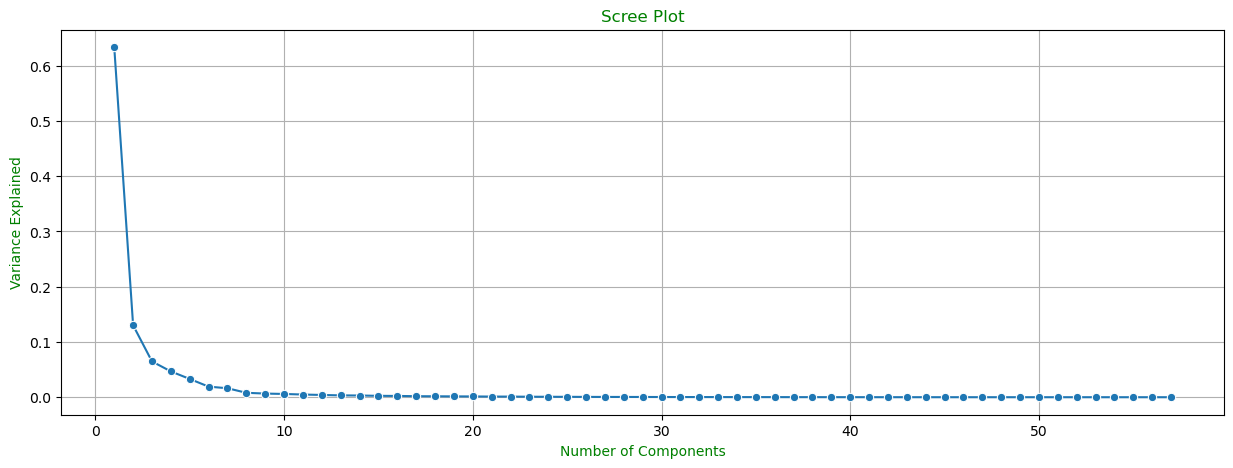

In [119]:
# Create a scree plot
plt.figure(figsize=(15,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10,color='green')
plt.ylabel('Variance Explained',fontsize=10,color='green')
plt.title('Scree Plot',fontsize=12,color='green')
plt.grid()
plt.show()

**Part 2 --2.6 PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.**

In [38]:
exp_var_ratio.cumsum()

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781, 0.99894611, 0.99914077,
       0.99929979, 0.99942681, 0.99953668, 0.99962348, 0.99970417,
       0.99976476, 0.99980302, 0.99984042, 0.99987407, 0.99989927,
       0.99991853, 0.99993544, 0.99995055, 0.99996197, 0.99997207,
       0.9999797 , 0.99998619, 0.99999156, 0.9999952 , 0.99999762,
       0.99999919, 1.        ])

In [35]:
# Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264, 0.95902156, 0.96466793,
       0.96945356, 0.97358126, 0.97675877, 0.97972332, 0.98215096,
       0.98445448, 0.98627285, 0.98794626, 0.98945019, 0.99086751,
       0.99202391, 0.99312884, 0.99397446, 0.99477935, 0.99554613,
       0.9961055 , 0.99660681, 0.99708936, 0.99749984, 0.99788572,
       0.99821413, 0.99849265, 0.99873781, 0.99894611, 0.99914077,
       0.99929979, 0.99942681, 0.99953668, 0.99962348, 0.99970417,
       0.99976476, 0.99980302, 0.99984042, 0.99987407, 0.99989927,
       0.99991853, 0.99993544, 0.99995055, 0.99996197, 0.99997207,
       0.9999797 , 0.99998619, 0.99999156, 0.9999952 , 0.99999762,
       0.99999919, 1.        ])

* If we see the cumulative variance ratio, the first five components contribute to atleast percent and hence we will be reducing the dimensionality by considering the first 5 components for further analysis.
* Hence the optimum number of PCs that covers atleat 90% of the explained variance is 5.

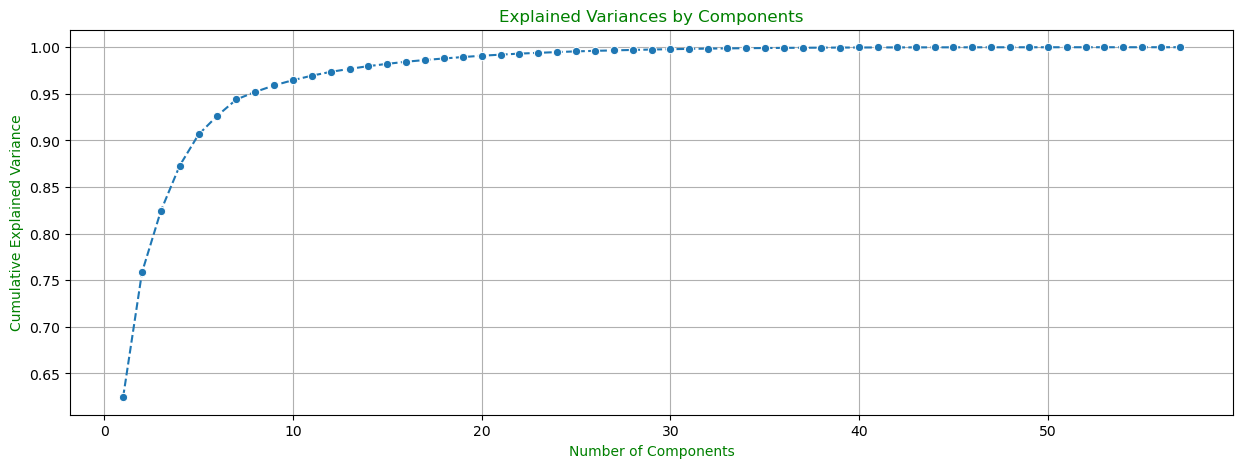

In [39]:
# Create a scree plot for cummulative sum of explained variance ratio..
plt.figure(figsize=(15,5))
sns.lineplot(y=exp_var_ratio.cumsum(),x=range(1,58),marker='o',linestyle = '--')
plt.xlabel('Number of Components',fontsize=10,color='green')
plt.ylabel('Cumulative Explained Variance',fontsize=10,color='green')
plt.title('Explained Variances by Components',fontsize=12,color='green')
plt.grid()
plt.show()

* The cummulative percentage gives the total percentage of variances accounted by the components. 
* The sum of the explained variance ratio illustrates that the first component covers almost 63% of variance and the first and the second component together contribute almost 76% of variance in the dataset and so on.

In [51]:
# find the least number of components that can explain more than 90% variance
total = 0
for ix, i in enumerate(exp_var_ratio):
  total = total + i
  if(total > 0.90):
    print("Number of PCs that explain at least 90% variance: ", ix+1)
    break

Number of PCs that explain at least 90% variance:  5


**Part 2 --2.7 PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.**

In [40]:
# Choose the PCs basis cumulative explained variance..
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [41]:
# Check the selected PCs..
df_selected

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

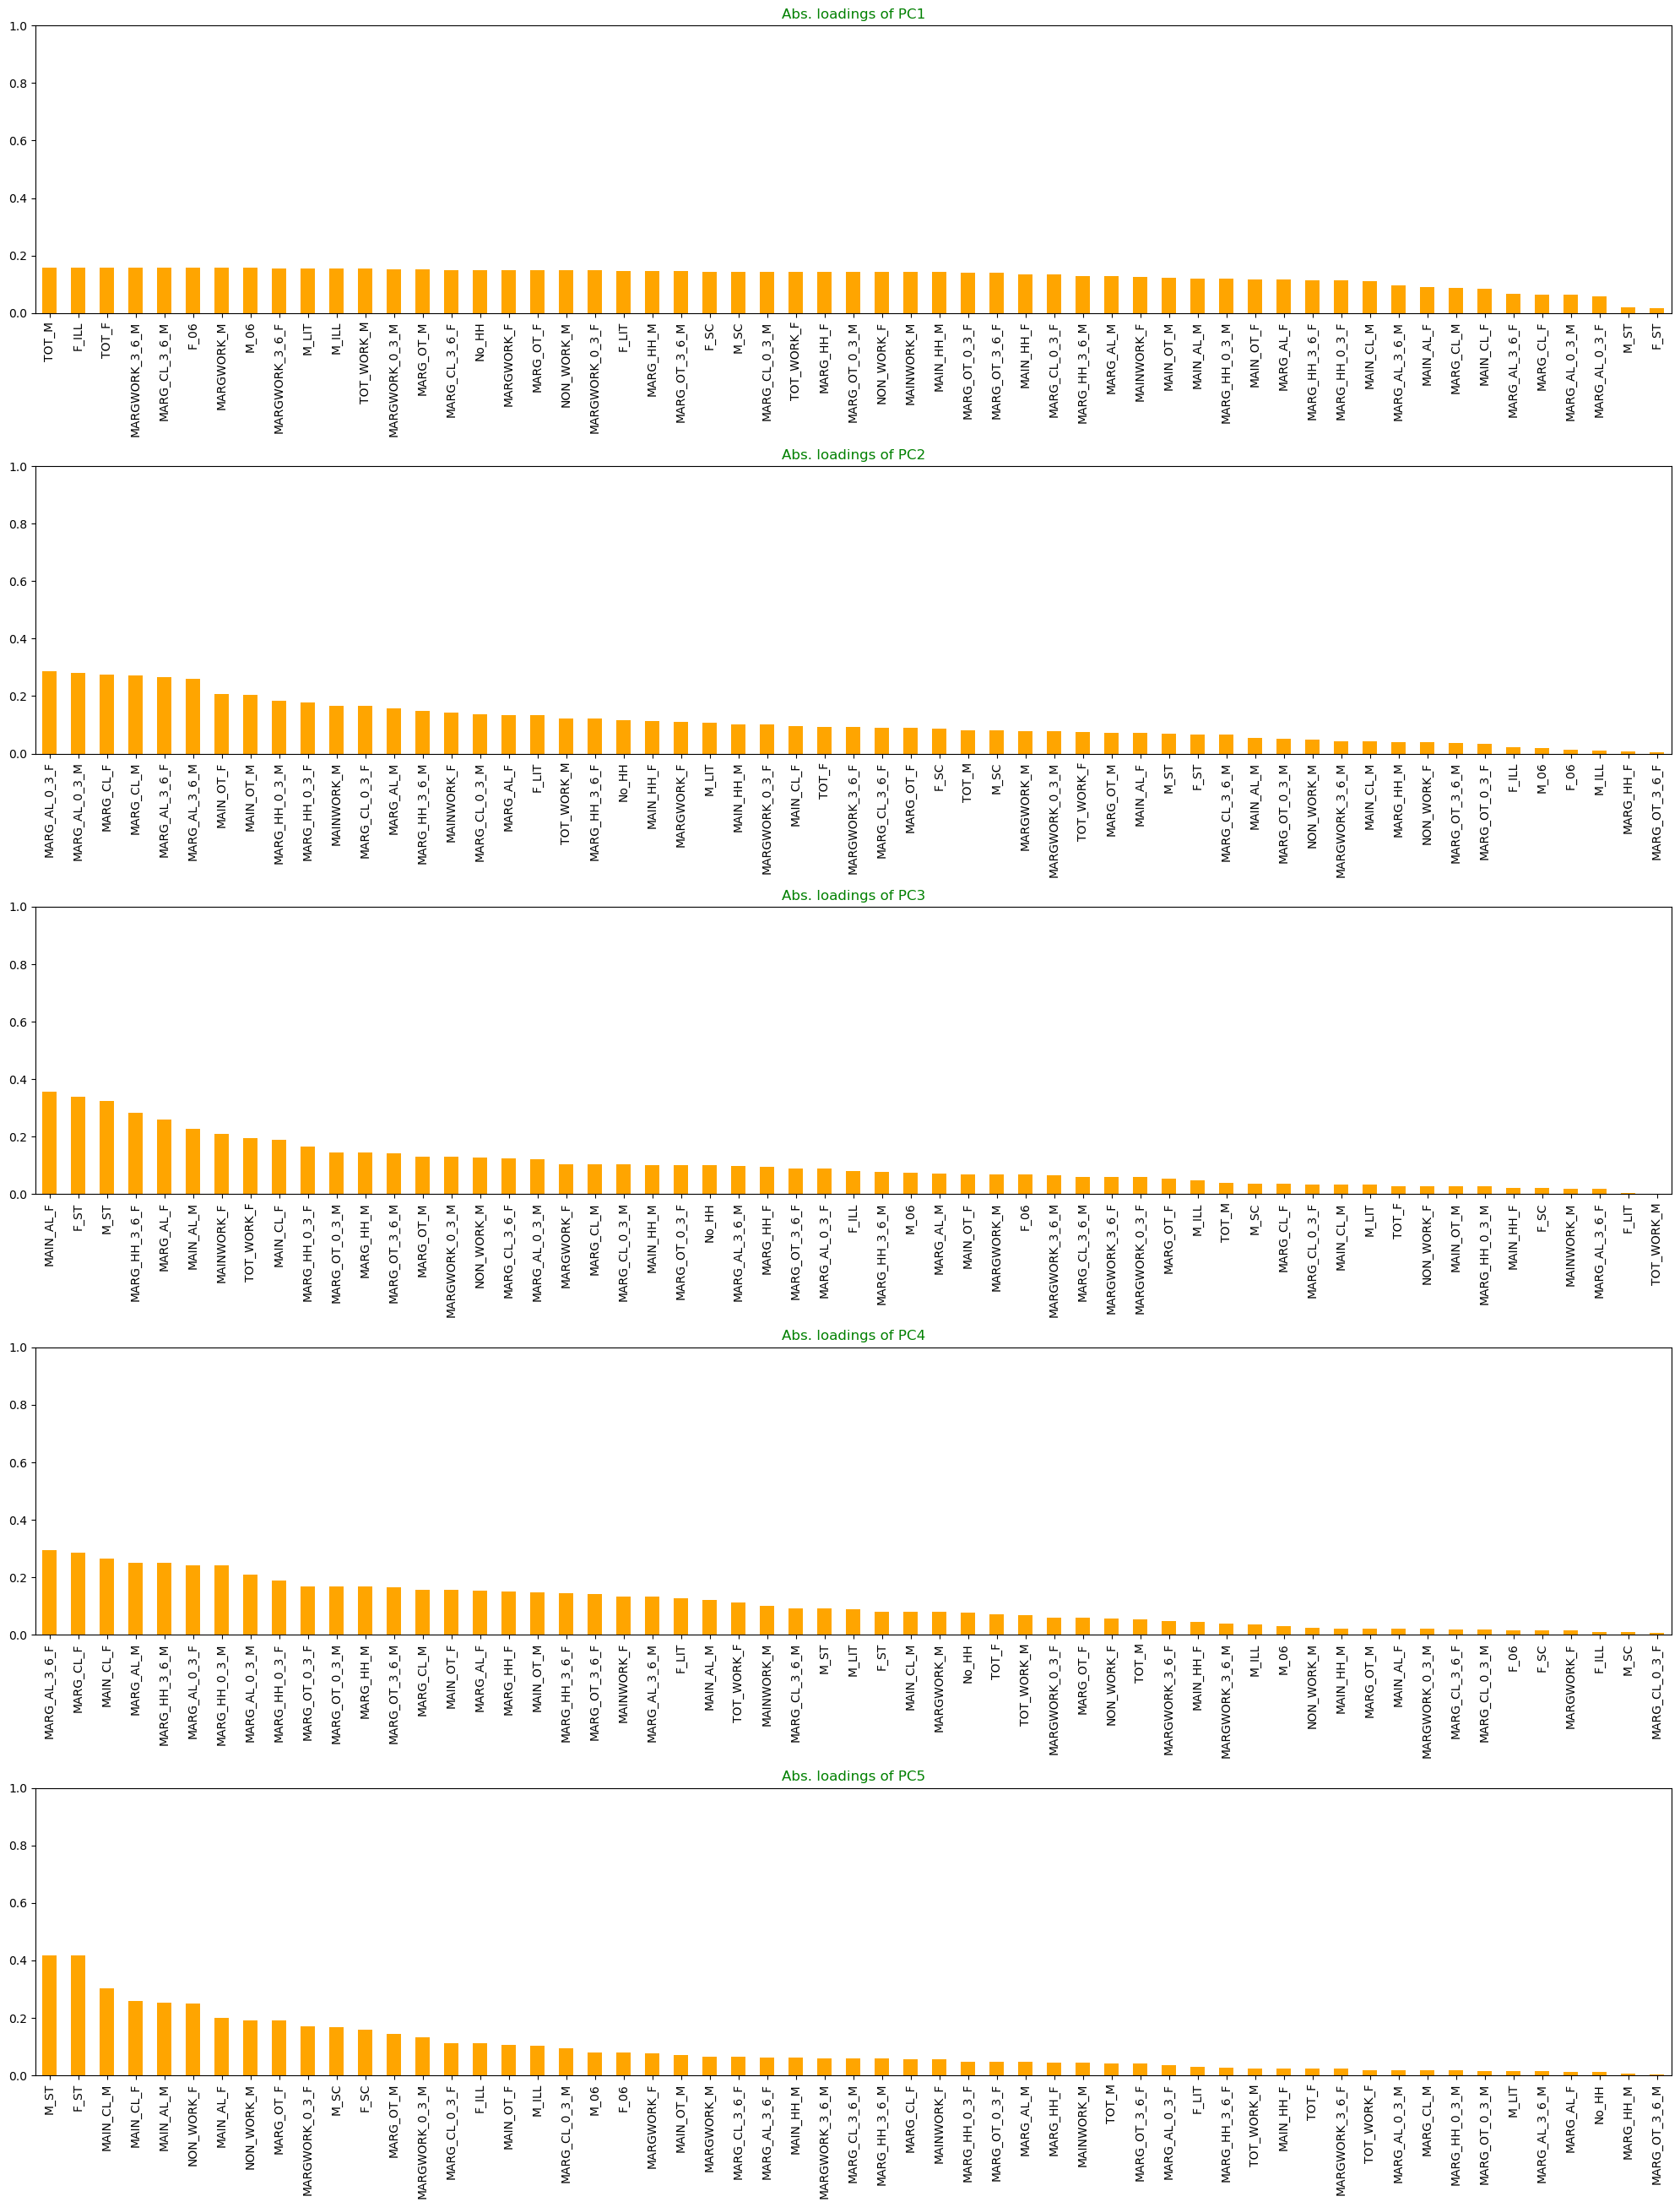

In [42]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (20,30))
for i in range(len(df_selected.columns)):
    plt.subplot(6,1,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar(color='orange')
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]),color='green')
    plt.tight_layout()

**Inference:**
**Characteristics of different PCs:-**
* PC1 has the highest value of TOT_M , F_ILL and so on..
* PC2 has the highest value of MARG_AL_0_3_F ,MARG_AL_0_3_M and so on..
* PC3 has the highest value of MAIN_AL_M, F_ST and so on..
* PC4 has the highest value of MARG_AL_3_6_F, MAIN_CL_F and so on..
* PC5 has the highest value of M_ST, F_ST and so on..
* PC6 has the highest value of MAIN_CL_M, MARG_OT_3_6_F and so on..

In [43]:
from matplotlib.patches import Rectangle

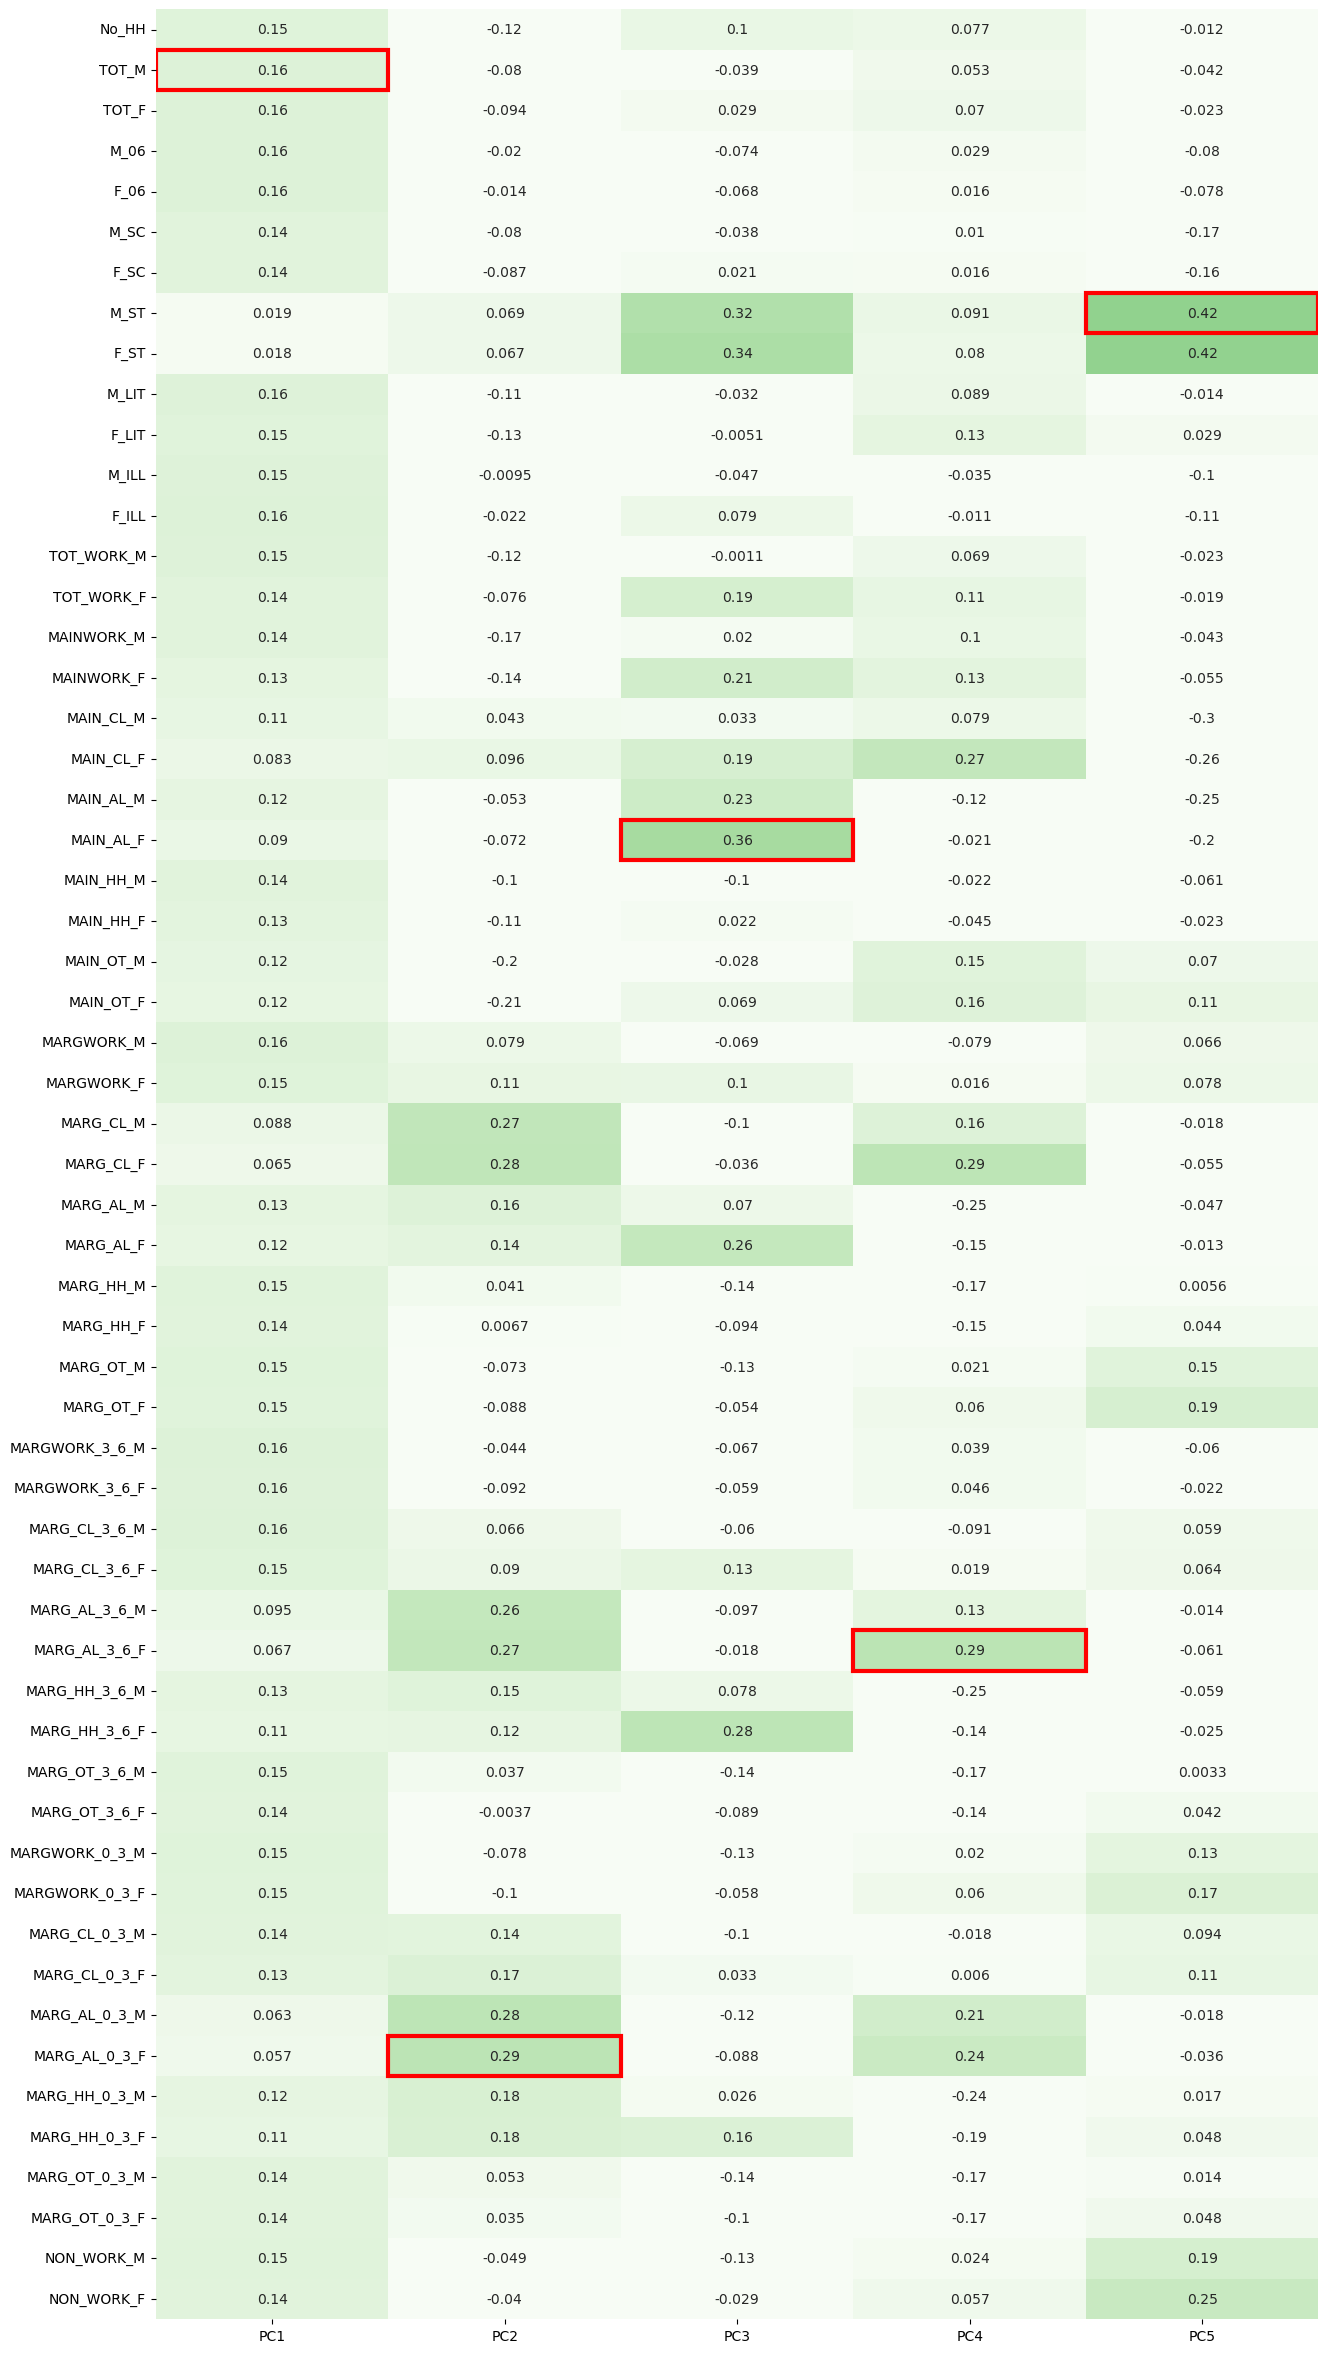

In [44]:
# Compare how the original features influence various PCs
fig,ax = plt.subplots(figsize=(15, 30), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_selected, annot=True, vmax=1.0, vmin=0, cmap='Greens', cbar=False, fmt='.2g', ax=ax,)

column_max = df_selected.abs().idxmax(axis=0)

for col, variable in enumerate(df_selected.columns):
    position = df_selected.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))
    
plt.savefig("Heatmap2.jpg")

**Each PCs has its own unique characteristics..**
* PC1 alone captures 63% of the data/information and PC2 captures almost 13% of the data and so on..
* TOT_M has the highest magnitude in PC1 of almost 16%(0.16)..
* MARG_AL_0_3_M,MARG_AL_0_3_F has the highest magnitude in PC2 of 29%.
* MAIN_AL_F has the highest magnitude of 35%. in PC3.
* MAIN_CL_F,MARG_AL_3_0_F is high in PC4.
* M_ST,F_ST has the highest magnitude in PC5..
* MAIN_CL_M is high in PC6.

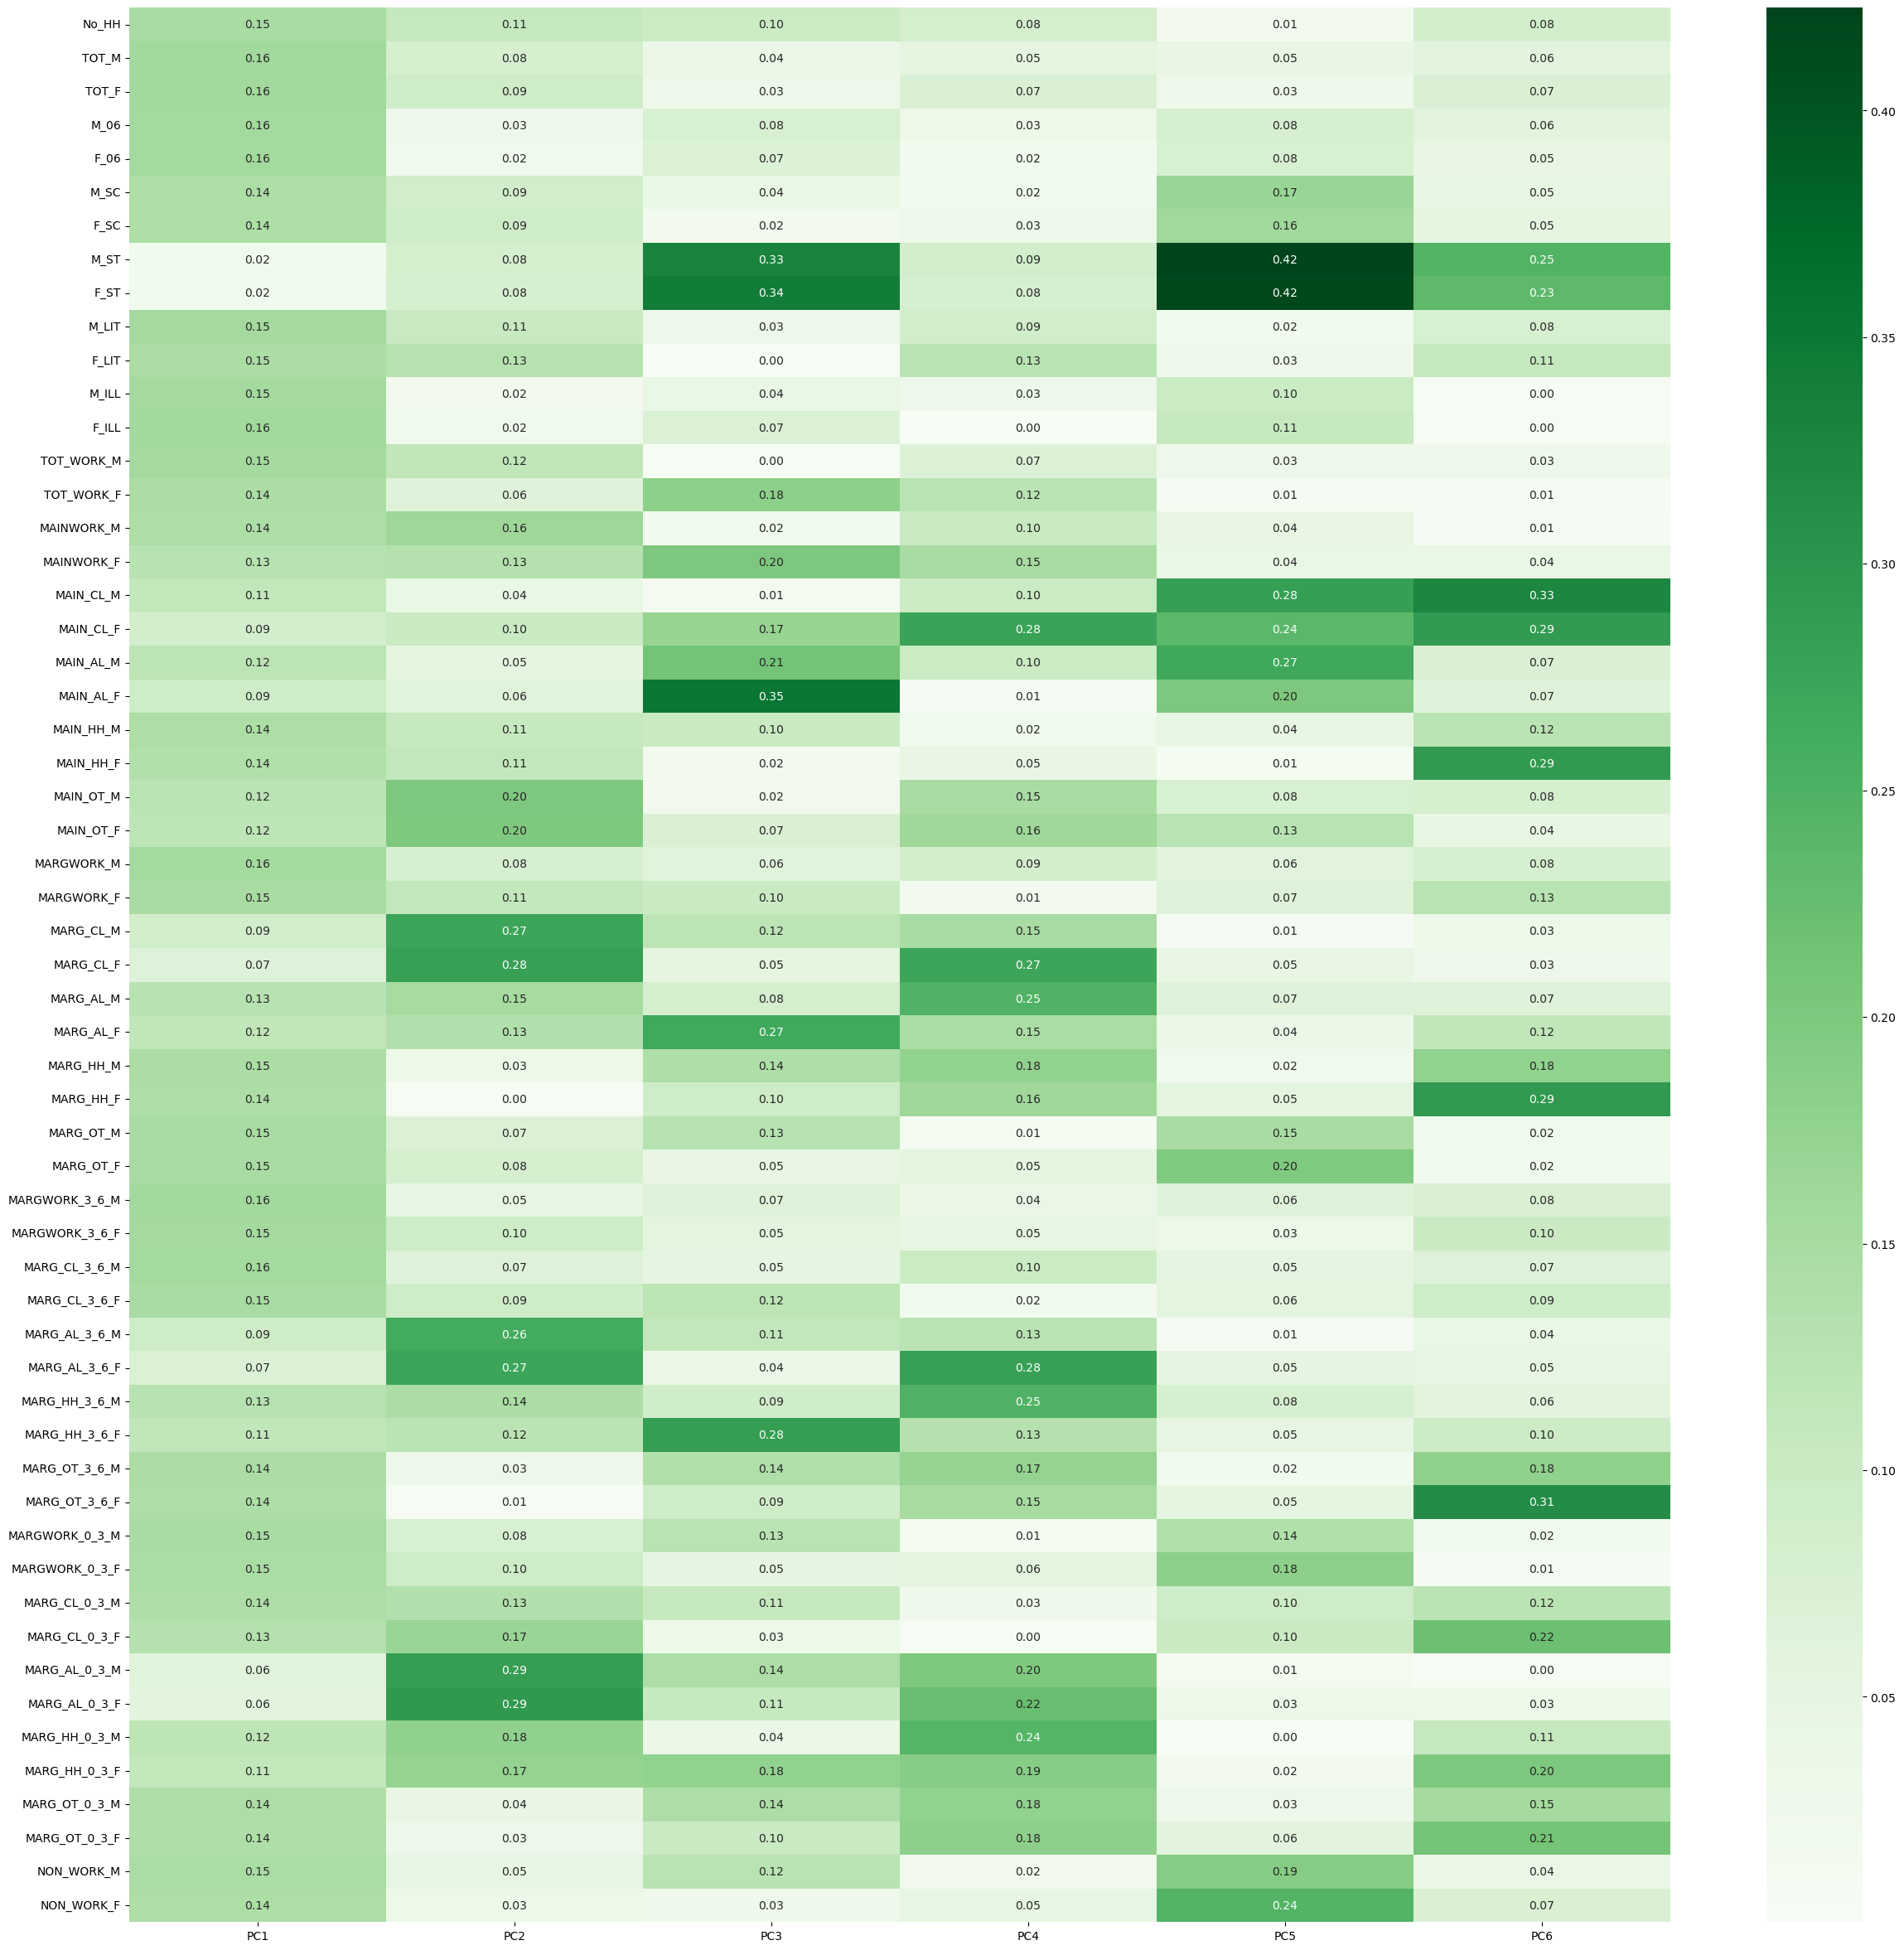

In [125]:
# Compare how the original features influence various PCs
plt.figure(figsize = (30,30))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Greens',fmt = '.2f');

**Each PCs has its own unique characteristics..**
* PC1 alone captures 63% of the data/information and PC2 captures almost 13% of the data and so on..
* TOT_M,TOT_F,M_06,F_06,F_LL has the highest magnitude in PC1 of almost 16%(0.16)..
* MARG_AL_0_3_M,MARG_AL_0_3_F has the highest magnitude in PC2 of 29%.
* MAIN_AL_F has the highest magnitude of 35%. in PC3.
* MAIN_CL_F,MARG_AL_3_0_F is high in PC4.
* M_ST,F_ST has the highest magnitude in PC5..
* MAIN_CL_M is high in PC6.

In [45]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(pca_scaled_censusdata)

In [46]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5
0 -5.528161  0.430378 -1.473827 -1.278049  0.376358
1 -5.492016 -0.106110 -2.015641 -1.750168 -0.006857
2 -7.474643 -0.217194 -0.247428  0.006079  0.556282
3 -7.919737 -0.652311 -0.659220 -0.735550  0.272465
4 -5.175695  2.304059 -1.157327  1.060796  1.080249
5 -3.647563  4.598733 -1.742810  3.301079  1.212639
6 -6.178820 -0.256962 -1.234310 -0.121392 -0.173580
7 -5.436802  0.237215 -1.664352 -1.163284  0.220704
8 -6.099449  0.004985 -1.563508 -1.537818  0.364566
9 -4.972562 -1.970847 -1.707058 -0.676605  0.614131

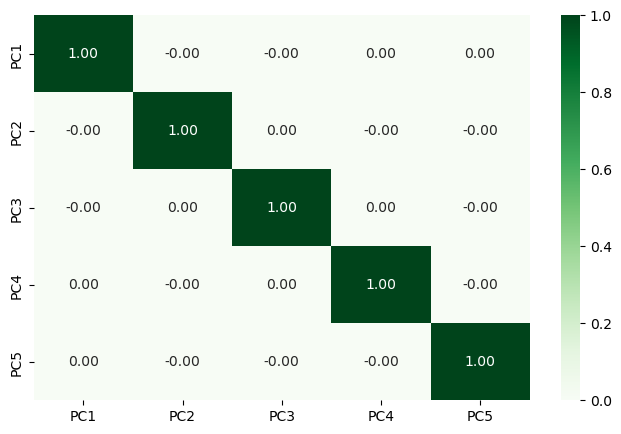

In [47]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (8,5))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f',cmap='Greens')
plt.savefig("Heatmap3")

**Part 2 --2.8 PCA: Write linear equation for first PC.**

In [48]:
# we need the original scaled features
pca_scaled_censusdata.iloc[0]

No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
MARGWORK_3_6_M   -0.731300
MARGWORK_3_6_F   -0.787295
M

In [55]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',pca_scaled_censusdata.columns[i],end=' + ')

( 0.15 ) * No_HH + ( 0.16 ) * TOT_M + ( 0.16 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.14 ) * M_SC + ( 0.14 ) * F_SC + ( 0.02 ) * M_ST + ( 0.02 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.15 ) * M_ILL + ( 0.16 ) * F_ILL + ( 0.15 ) * TOT_WORK_M + ( 0.14 ) * TOT_WORK_F + ( 0.14 ) * MAINWORK_M + ( 0.13 ) * MAINWORK_F + ( 0.11 ) * MAIN_CL_M + ( 0.08 ) * MAIN_CL_F + ( 0.12 ) * MAIN_AL_M + ( 0.09 ) * MAIN_AL_F + ( 0.14 ) * MAIN_HH_M + ( 0.13 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.12 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.15 ) * MARGWORK_F + ( 0.09 ) * MARG_CL_M + ( 0.07 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.12 ) * MARG_AL_F + ( 0.15 ) * MARG_HH_M + ( 0.14 ) * MARG_HH_F + ( 0.15 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.16 ) * MARG_CL_3_6_M + ( 0.15 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.07 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.15 ) * MARG_OT_3_6_M + ( 

In [54]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',"(",np.round(pca_scaled_censusdata.iloc[0][i],2),")",end=' + ')

( 0.15 ) * ( -1.04 ) + ( 0.16 ) * ( -0.87 ) + ( 0.16 ) * ( -0.94 ) + ( 0.16 ) * ( -0.62 ) + ( 0.16 ) * ( -0.56 ) + ( 0.14 ) * ( -1.08 ) + ( 0.14 ) * ( -1.08 ) + ( 0.02 ) * ( -0.51 ) + ( 0.02 ) * ( -0.57 ) + ( 0.16 ) * ( -0.94 ) + ( 0.15 ) * ( -0.97 ) + ( 0.15 ) * ( -0.64 ) + ( 0.16 ) * ( -0.84 ) + ( 0.15 ) * ( -1.01 ) + ( 0.14 ) * ( -1.16 ) + ( 0.14 ) * ( -1.07 ) + ( 0.13 ) * ( -1.12 ) + ( 0.11 ) * ( -1.14 ) + ( 0.08 ) * ( -1.18 ) + ( 0.12 ) * ( -0.95 ) + ( 0.09 ) * ( -0.9 ) + ( 0.14 ) * ( -0.92 ) + ( 0.13 ) * ( -0.9 ) + ( 0.12 ) * ( -0.92 ) + ( 0.12 ) * ( -0.99 ) + ( 0.16 ) * ( -0.57 ) + ( 0.15 ) * ( -1.04 ) + ( 0.09 ) * ( -0.35 ) + ( 0.07 ) * ( -0.76 ) + ( 0.13 ) * ( -0.33 ) + ( 0.12 ) * ( -0.93 ) + ( 0.15 ) * ( -0.47 ) + ( 0.14 ) * ( -0.66 ) + ( 0.15 ) * ( -0.67 ) + ( 0.15 ) * ( -0.8 ) + ( 0.16 ) * ( -0.73 ) + ( 0.16 ) * ( -0.79 ) + ( 0.16 ) * ( -0.66 ) + ( 0.15 ) * ( -1.08 ) + ( 0.09 ) * ( -0.42 ) + ( 0.07 ) * ( -0.85 ) + ( 0.13 ) * ( -0.48 ) + ( 0.11 ) * ( -0.96 ) + ( 0.15 ) * ( -